<center><img src="https://www.paisabazaar.com/wp-content/uploads/2019/09/Personal-Loan-1.jpg"></center>

<b><h1><center><span style='background :lightblue' >Supervised Learning Classification </span></center></h1></b>

<h2><center><span style='background :teal' >Logistic Regression & Decision Tree</span></center></h2>

## Table of Content:

* [Context](#context)

* [Data Dictionary](#data-dic)

* [Understanding of Data](#data-under)

* [Data Preprocessing](#data-pre)

* [Exploratory Data Analysis](#eda)

* [Model Building](#model-build)

* [Logistic Regression](#log-reg)

* [Decision Tree](#dec-tree)

* [Conclusion](#con)

* [Insights & Recommendations](#in-rec)


## Context <a class="anchor" id="context"></a>

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.


### Objective

1. To predict a liability customer to buy a personal loan or not.
2. Most significant variables 
3. Segment of customers to be targeted.

## Data Dictionary <a class="anchor" id="data-dic"></a>

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build Machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    confusion_matrix,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

In [2]:
# installing Zipcodes library
!pip install zipcodes
import zipcodes as zcode  # to get zipcodes

<IPython.core.display.Javascript object>

## Understanding the structure of the Data <a class="anchor" id="data-under"></a>

In [3]:
loan_data = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [4]:
# copying data to another varaible to avoid any changes to original data
data = loan_data.copy()

<IPython.core.display.Javascript object>

In [5]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [6]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [7]:
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

In [8]:
# Sample of the data
data.sample(n=10, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [9]:
# Dropping the id column as it does not add any value to the analysis
data.drop("ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
data[data.duplicated()].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


<IPython.core.display.Javascript object>

In [12]:
# checking missing values
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
data.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# Checking the statistical summary of the variables.
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

#### Observations

* There is no missing values in any variable. 
* All the variables are integer type except CCAvg which is a float.
* `Family`, `Education`, `Personal_Loan`,`Securities_Account`,`CD_Account`, `Online` and `CreditCard` are looks like a categorical variables from the nunique results.

**Statistical summary results**

- `Experience`is having some negative values which looks like meaningless and need to be treated.

- `Personal_Loan`,`Securities_Account`,`CD_Account`, `Online` and `CreditCard` are have values 0 & 1. 

- `Income` & `Mortgate` variables maximum value looks like huge compare to the 75%(3rd quartile) values.  

- `ZIPCode`needs to be converted to State/County/Region as the values are very different from the other variables. 


## Data Preprocessing <a class="anchor" id="data-pre"></a>

### ZIP Code column processing

In [15]:
data["ZIPCode"].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
## Source::: https://pypi.org/project/zipcodes/
print(zcode.matching("94609"))

[{'zip_code': '94609', 'zip_code_type': 'STANDARD', 'active': True, 'city': 'Oakland', 'acceptable_cities': [], 'unacceptable_cities': [], 'state': 'CA', 'county': 'Alameda County', 'timezone': 'America/Los_Angeles', 'area_codes': ['510'], 'world_region': 'NA', 'country': 'US', 'lat': '37.8348', 'long': '-122.2635'}]


<IPython.core.display.Javascript object>

In [17]:
zip_code = data["ZIPCode"].unique()

<IPython.core.display.Javascript object>

In [18]:
# Creating a dictionary of State by using library zipcode and matching method.
dict_state = {}
for zipcode in zip_code:
    state_list = zcode.matching(zipcode.astype("str"))
    if len(state_list) == 1:
        state = state_list[0].get("state")
    else:
        state = zipcode

    dict_state.update({zipcode: state})

<IPython.core.display.Javascript object>

In [19]:
dict_state.values()

dict_values(['CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 92717, 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'C

<IPython.core.display.Javascript object>

#### Since all the county's are in "CA", we can consider "County"

In [20]:
# Creating a dictionary of county by using library zipcode and matching method.
zip_dict = {}
for zipcode in zip_code:
    county_list = zcode.matching(zipcode.astype("str"))
    # IF zipcode is present then get county else assign zipcode to county
    if len(county_list) == 1:
        county = county_list[0].get("county")
    else:
        county = zipcode

    zip_dict.update({zipcode: county})

<IPython.core.display.Javascript object>

In [21]:
data["County"] = data["ZIPCode"].map(zip_dict)

<IPython.core.display.Javascript object>

In [22]:
data["County"].unique()

array(['Los Angeles County', 'Alameda County', 'San Francisco County',
       'San Diego County', 'Monterey County', 'Ventura County',
       'Santa Barbara County', 'Marin County', 'Santa Clara County',
       'Santa Cruz County', 'San Mateo County', 'Humboldt County',
       'Contra Costa County', 'Orange County', 'Sacramento County',
       'Yolo County', 'Placer County', 'San Bernardino County',
       'San Luis Obispo County', 'Riverside County', 'Kern County', 92717,
       'Fresno County', 'Sonoma County', 'El Dorado County',
       'San Benito County', 'Butte County', 'Solano County', 93077,
       'Mendocino County', 92634, 'San Joaquin County', 96651,
       'Imperial County', 'Siskiyou County', 'Merced County',
       'Trinity County', 'Stanislaus County', 'Shasta County',
       'Tuolumne County', 'Napa County', 'Lake County'], dtype=object)

<IPython.core.display.Javascript object>

In [23]:
# 92717 - Irvine, Orange County
# 93077 - Bad Abbach, Bavaria
# 92634 - Orange County
# 96651 - Washington DC
zip_dict.update({92717: "Orange County"})
zip_dict.update({92634: "Orange County"})
zip_dict.update({93077: "Others"})
zip_dict.update({96651: "Others"})
data["County"] = data["ZIPCode"].map(zip_dict)

<IPython.core.display.Javascript object>

In [24]:
data["County"].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Others  

<IPython.core.display.Javascript object>

In [25]:
## Source: https://www.calbhbc.org/region-map-and-listing.html

county_list = {
    "Los Angeles County": "LOS ANGELES",
    "Alameda County": "BAY",
    "San Francisco County": "BAY",
    "San Diego County": "SOUTHERN",
    "Monterey County": "BAY",
    "Ventura County": "SOUTHERN",
    "Santa Barbara County": "SOUTHERN",
    "Marin County": "BAY",
    "Santa Clara County": "BAY",
    "Santa Cruz County": "BAY",
    "San Mateo County": "BAY",
    "Humboldt County": "SUPERIOR",
    "Contra Costa County": "BAY",
    "Orange County": "SOUTHERN",
    "Sacramento County": "CENTRAL",
    "Yolo County": "CENTRAL",
    "Placer County": "CENTRAL",
    "San Bernardino County": "SOUTHERN",
    "San Luis Obispo County": "SOUTHERN",
    "Riverside County": "SOUTHERN",
    "Kern County": "SOUTHERN",
    "Fresno County": "CENTRAL",
    "Sonoma County": "BAY",
    "El Dorado County": "CENTRAL",
    "San Benito County": "BAY",
    "Butte County": "SUPERIOR",
    "Solano County": "BAY",
    "Mendocino County": "SUPERIOR",
    "San Joaquin County": "CENTRAL",
    "Imperial County": "SOUTHERN",
    "Siskiyou County": "SUPERIOR",
    "Merced County": "CENTRAL",
    "Trinity County": "SUPERIOR",
    "Stanislaus County": "CENTRAL",
    "Shasta County": "SUPERIOR",
    "Tuolumne County": "CENTRAL",
    "Napa County": "BAY",
    "Lake County": "SUPERIOR",
    "Others": "BAY",
}

<IPython.core.display.Javascript object>

In [26]:
data["Region"] = data["County"].map(county_list)

<IPython.core.display.Javascript object>

In [27]:
data.Region.unique()

array(['LOS ANGELES', 'BAY', 'SOUTHERN', 'SUPERIOR', 'CENTRAL'],
      dtype=object)

<IPython.core.display.Javascript object>

In [28]:
data.sample(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Region
46,39,14,43,95014,3,0.7,2,153,0,0,0,1,0,Santa Clara County,BAY
1894,51,25,29,94303,4,0.1,1,0,0,0,0,1,1,San Mateo County,BAY
1916,57,32,64,95138,3,1.6,3,0,0,0,0,1,0,Santa Clara County,BAY
2623,42,17,111,94304,3,3.0,1,0,1,1,1,0,1,Santa Clara County,BAY
3805,29,5,84,93109,3,0.8,1,0,0,0,0,0,0,Santa Barbara County,SOUTHERN
111,62,38,45,94143,4,1.3,2,0,0,0,0,1,0,San Francisco County,BAY
3566,57,33,80,92064,2,2.8,1,0,0,0,0,1,1,San Diego County,SOUTHERN
4718,32,6,35,91107,3,1.0,1,0,0,1,0,1,0,Los Angeles County,LOS ANGELES
3400,48,22,39,94065,1,1.2,2,0,0,0,0,0,0,San Mateo County,BAY
395,60,35,64,94509,2,2.8,1,0,0,0,0,0,0,Contra Costa County,BAY


<IPython.core.display.Javascript object>

In [29]:
# Dropping the ZIPCode column as we converted it to County
data.drop("ZIPCode", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  County              5000 non-null   object 
 13  Region              5000 non-null   object 
dtypes: float64(1), int64(11), object(2)
memory usage: 547.0+ KB


<IPython.core.display.Javascript object>

### Fixing the data types

In [31]:
# Converting categorical varaible to category type from int64 to reduce the dataspace
category_col = [
    "Family",
    "Education",
    "Securities_Account",
    "CD_Account",
    #    "Personal_Loan",
    "Online",
    "CreditCard",
    "Region",
]
data[category_col] = data[category_col].astype("category")

<IPython.core.display.Javascript object>

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  County              5000 non-null   object  
 13  Region              5000 non-null   category
dtypes: category(7), float64(1), int64(5), object(1)
memory usage: 308.8+ KB


<IPython.core.display.Javascript object>

**Because of the Catefory conversion the memory usage reduced to around 300+ KB from around 500+ KB**

### Experience column processing

In [33]:
data["Experience"].value_counts().sort_values()

 43      3
-3       4
 42      8
-2      15
-1      33
 41     43
 40     57
 0      66
 1      74
 39     85
 2      85
 38     88
 12    102
 31    104
 4     113
 21    113
 36    114
 37    116
 11    116
 33    117
 13    117
 10    118
 8     119
 15    119
 6     119
 7     121
 29    124
 22    124
 27    125
 34    125
 17    125
 30    126
 14    127
 16    127
 3     129
 24    131
 26    134
 19    135
 18    137
 28    138
 25    142
 35    143
 23    144
 5     146
 9     147
 20    148
 32    154
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

In [34]:
data[data["Experience"] < 0].sort_values(by="Experience", ascending=True)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Region
4514,24,-3,41,4,1.00,3,0,0,0,0,1,0,Los Angeles County,LOS ANGELES
2618,23,-3,55,3,2.40,2,145,0,0,0,1,0,Orange County,SOUTHERN
4285,23,-3,149,2,7.20,1,0,0,0,0,1,0,Kern County,SOUTHERN
3626,24,-3,28,4,1.00,3,0,0,0,0,0,0,Los Angeles County,LOS ANGELES
2717,23,-2,45,4,0.60,2,0,0,0,0,1,1,Lake County,SUPERIOR
2876,24,-2,80,2,1.60,3,238,0,0,0,0,0,Los Angeles County,LOS ANGELES
3130,23,-2,82,2,1.80,2,0,0,1,0,0,1,San Diego County,SOUTHERN
2466,24,-2,80,2,1.60,3,0,0,0,0,1,0,San Francisco County,BAY
3796,24,-2,50,3,2.40,2,0,0,1,0,0,0,Marin County,BAY
2962,23,-2,81,2,1.80,2,0,0,0,0,0,0,Los Angeles County,LOS ANGELES


<IPython.core.display.Javascript object>

#### The Ages of persons with Experience negative is between 20 to 30. So, assuming they are studing yet to have 1, 2 or 3 years to complete the course or education. So, we can assume the Experience as "0".

In [35]:
data.loc[data["Experience"] < 0, "Experience"] = 0

<IPython.core.display.Javascript object>

In [36]:
data[data["Experience"] < 0].sort_values(by="Experience", ascending=True)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Region


<IPython.core.display.Javascript object>

In [37]:
data["Experience"].value_counts().sort_values()

43      3
42      8
41     43
40     57
1      74
39     85
2      85
38     88
12    102
31    104
4     113
21    113
36    114
37    116
11    116
13    117
33    117
0     118
10    118
15    119
8     119
6     119
7     121
22    124
29    124
34    125
27    125
17    125
30    126
14    127
16    127
3     129
24    131
26    134
19    135
18    137
28    138
25    142
35    143
23    144
5     146
9     147
20    148
32    154
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [38]:
for column in category_col:
    print(data[column].value_counts())
    print("-" * 50)

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
--------------------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
--------------------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------
BAY            1944
SOUTHERN       1449
LOS ANGELES    1095
CENTRAL         420
SUPERIOR         92
Name: Region, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

#### Observations

* Family type "1" and Education type "1" are having highest count than the other categories.
* Less people are having Securities_Account, CD_Account. 
* Only half the number of people are having other bank credit cards compare to who is not having. 
* Customers with Internet banking and without it are almost equal number of people.
* `Bay` are customers are in most numbers where `Superior` region are in least numbers. 

## Univariate Analysis

In [39]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [40]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [41]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

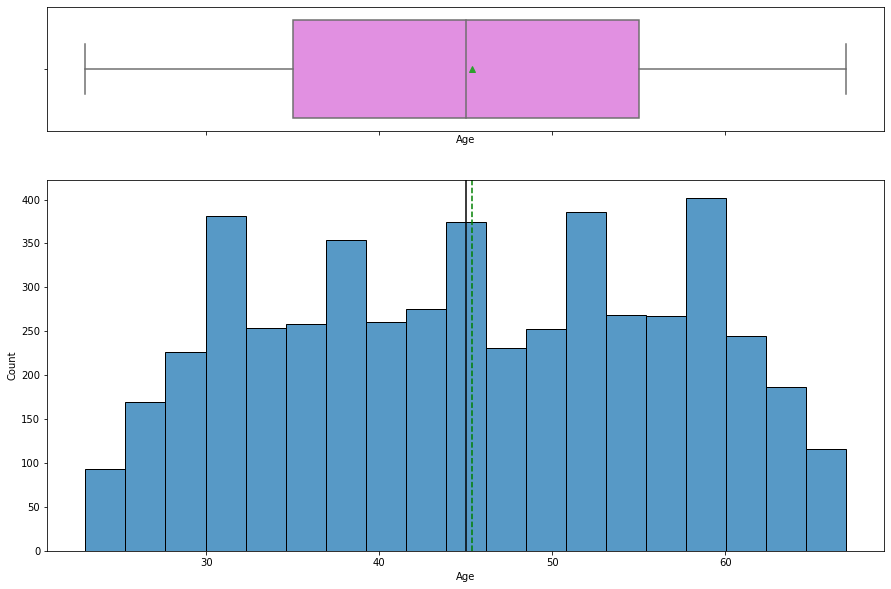

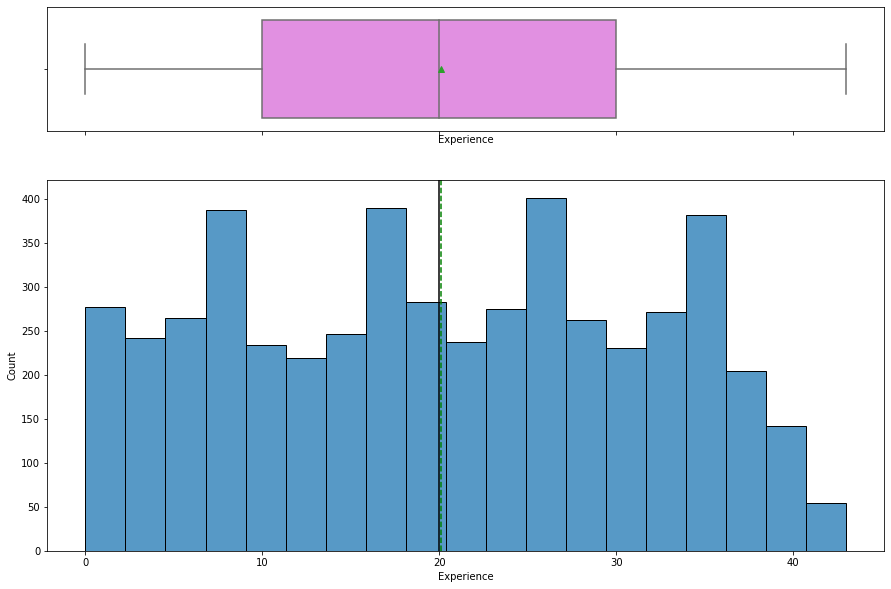

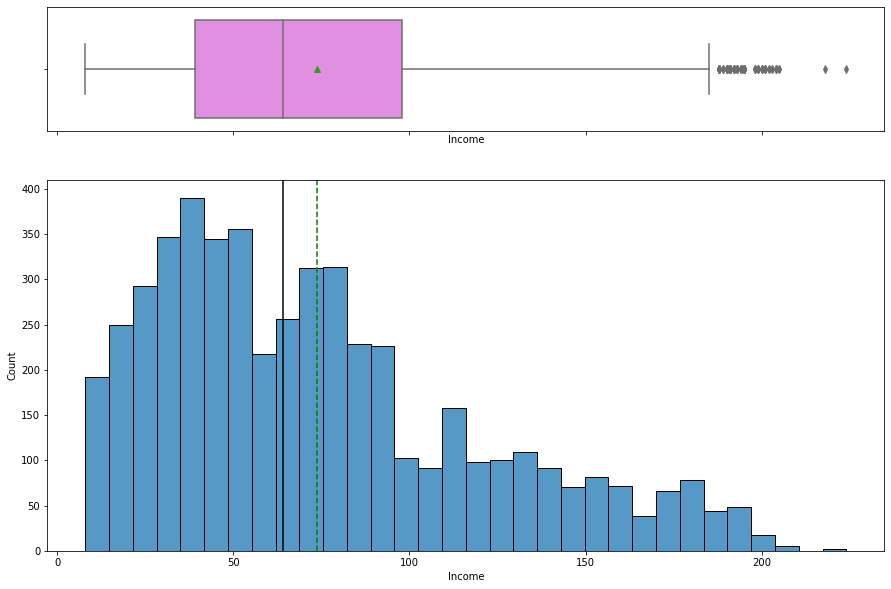

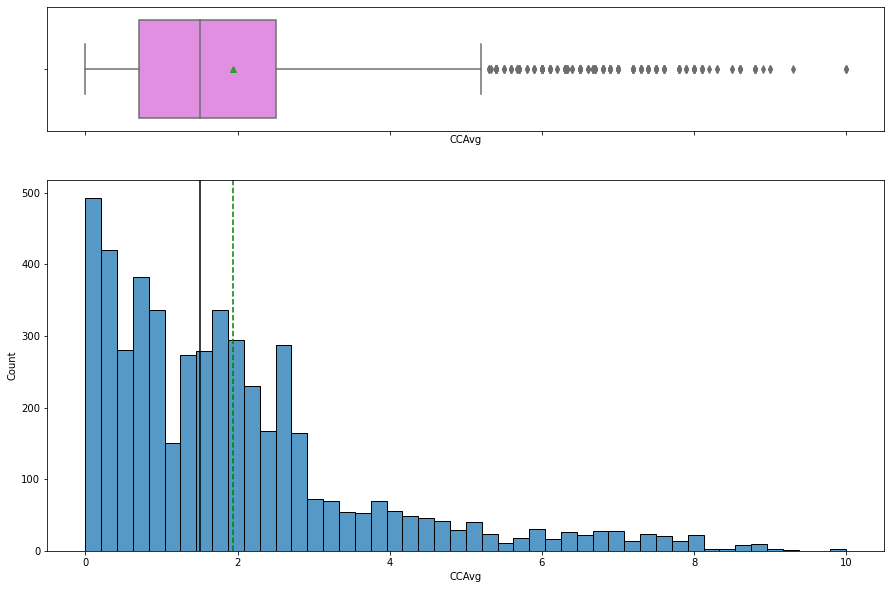

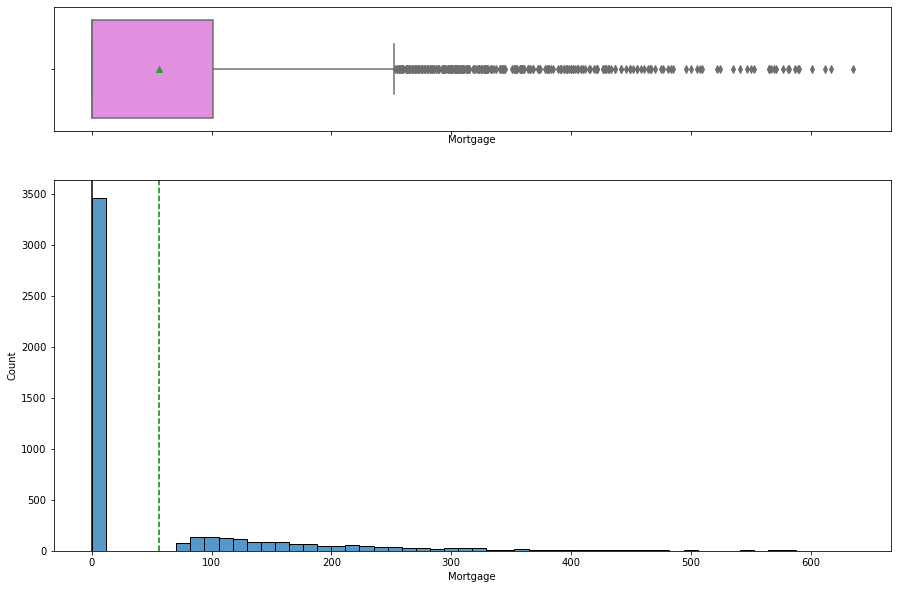

<IPython.core.display.Javascript object>

In [42]:
# select all numerical columns to understand further
num_col = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]
for i in range(len(num_col)):
    histogram_boxplot(data, num_col[i])

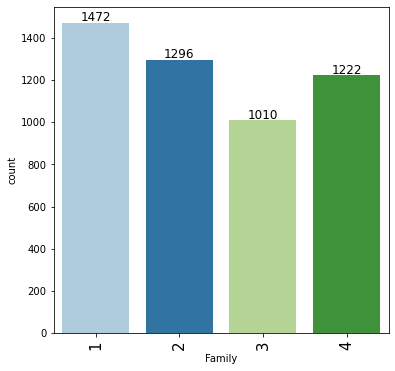

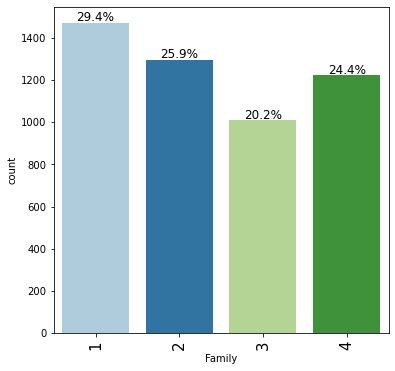

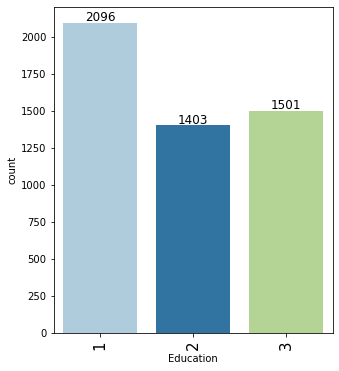

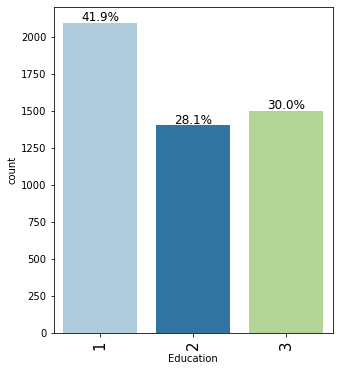

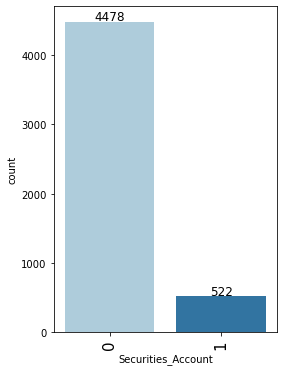

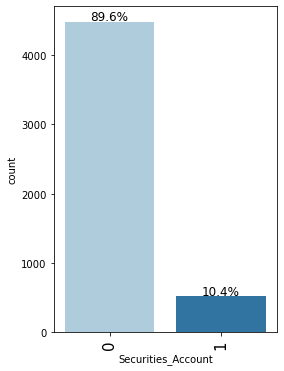

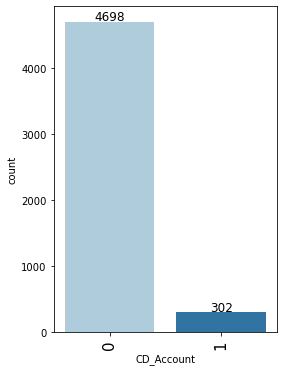

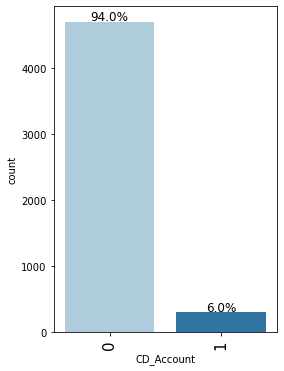

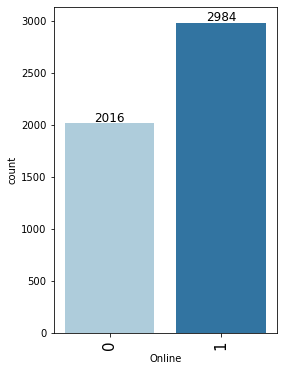

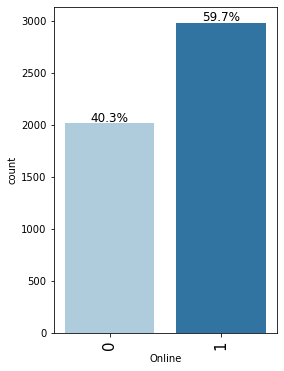

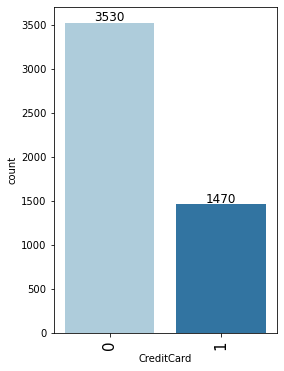

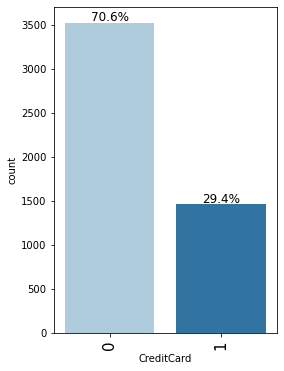

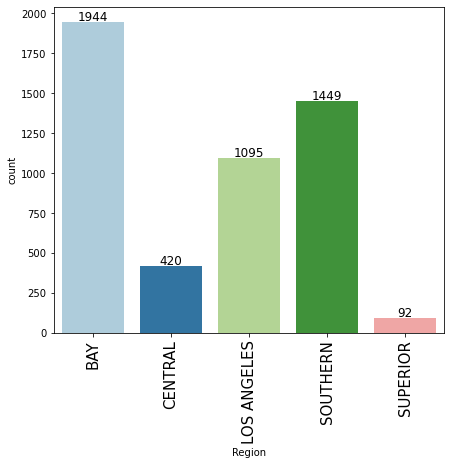

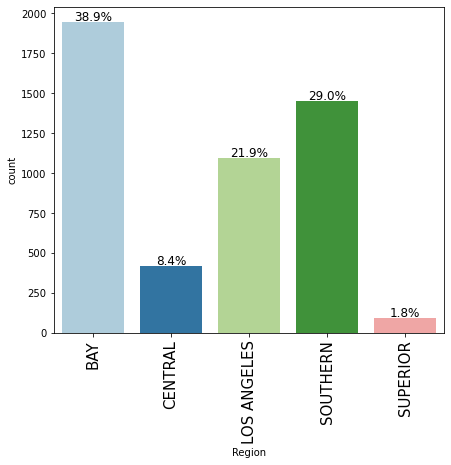

<IPython.core.display.Javascript object>

In [43]:
for i in range(len(category_col)):
    labeled_barplot(data, category_col[i])
    labeled_barplot(data, category_col[i], perc=True)

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


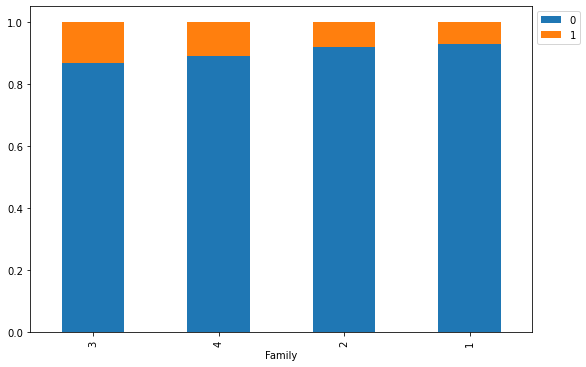

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


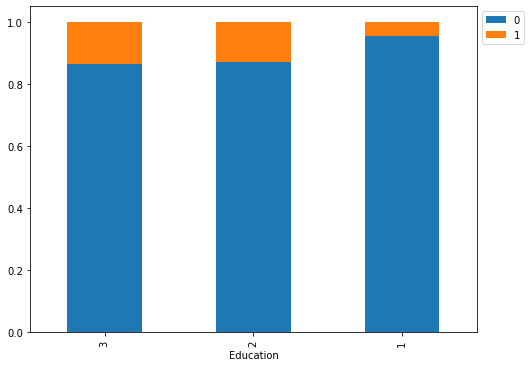

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


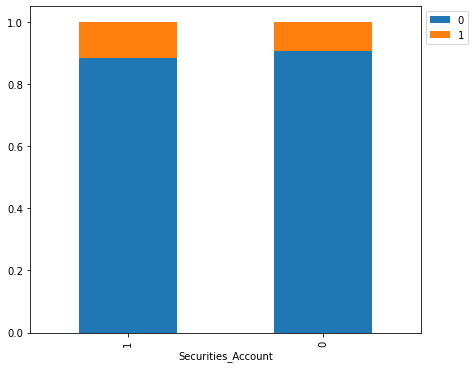

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


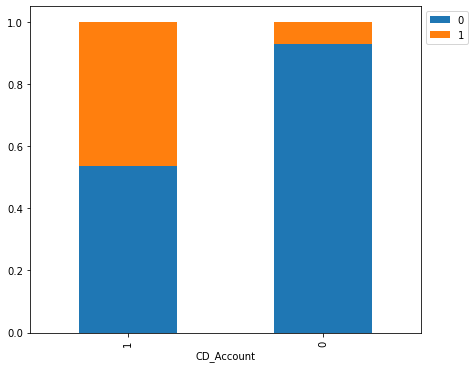

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


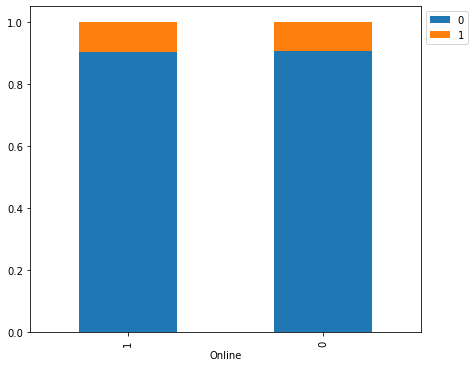

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


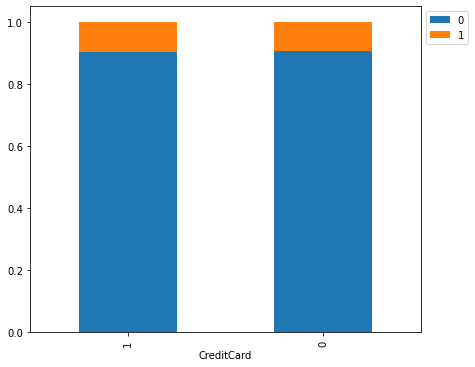

Personal_Loan     0    1   All
Region                        
All            4520  480  5000
BAY            1748  196  1944
SOUTHERN       1314  135  1449
LOS ANGELES     984  111  1095
CENTRAL         390   30   420
SUPERIOR         84    8    92
------------------------------------------------------------------------------------------------------------------------


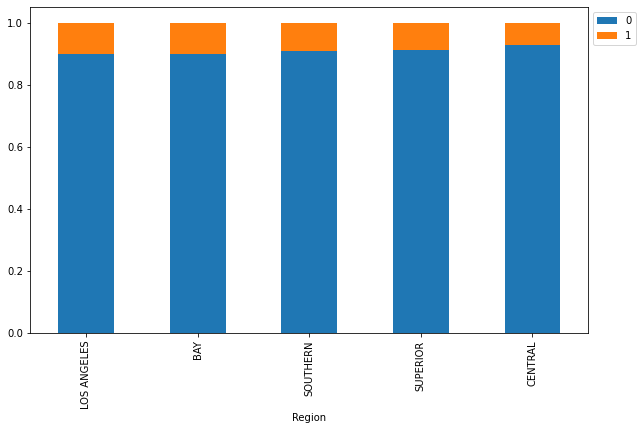

<IPython.core.display.Javascript object>

In [44]:
for i in range(len(category_col)):
    stacked_barplot(data, category_col[i], "Personal_Loan")

**Observation**

* Age and Experience are almost normally distributed with multiple peaks and there are no outliers. 

* Income, CCAvg and Mortage are right skewed and having outliers.

* All the family categories are having 20% around data.

* Education type 1- around 40%, 3- around 30% and 2- around 25%

* In all the variables, there are less customers with Personal_Loan 

* Exceptionally customers with **CD_Account** are having more Personal Loan.

## Bivariate Analysis

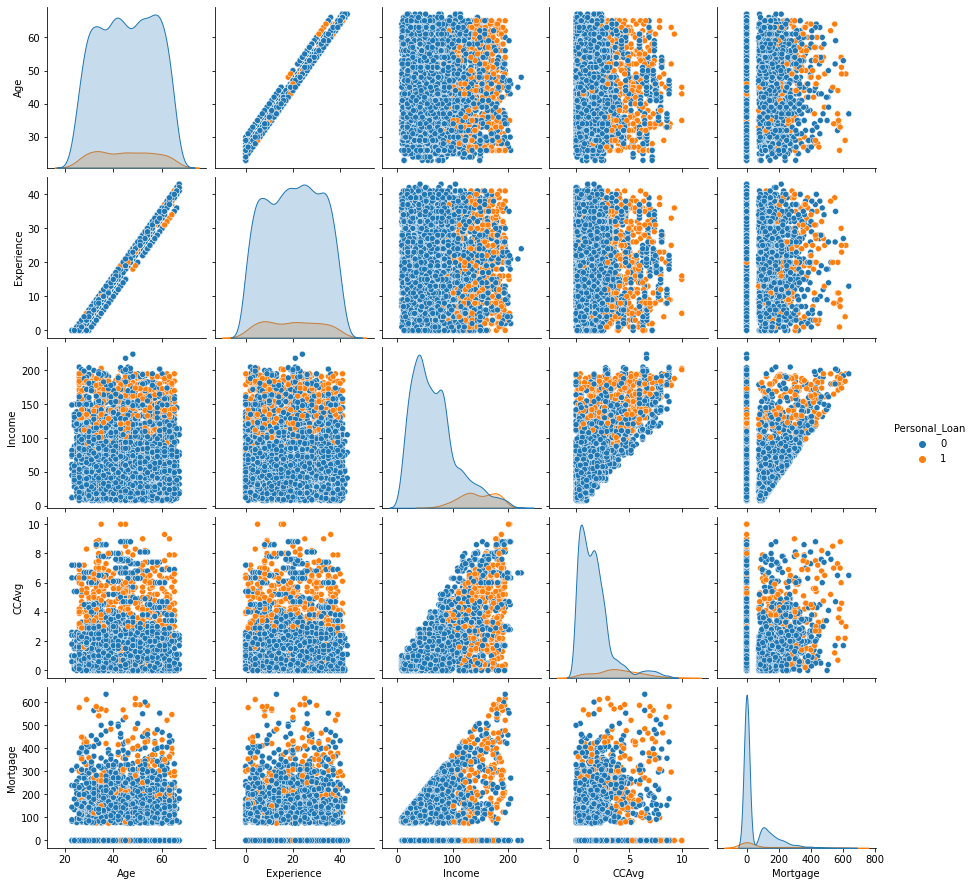

<IPython.core.display.Javascript object>

In [45]:
sns.pairplot(data, hue="Personal_Loan")

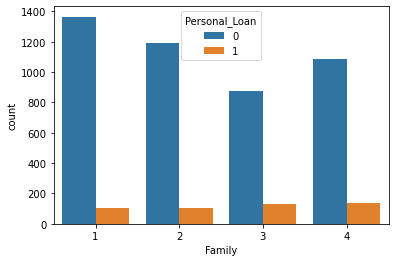

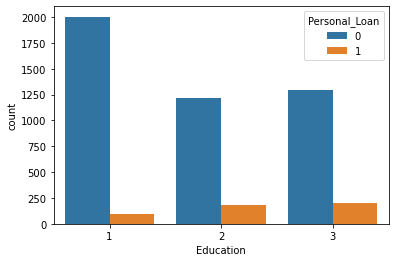

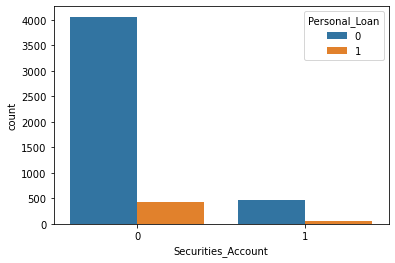

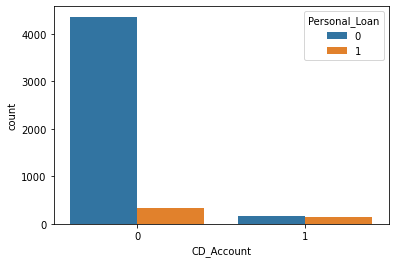

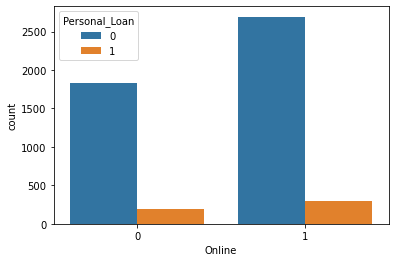

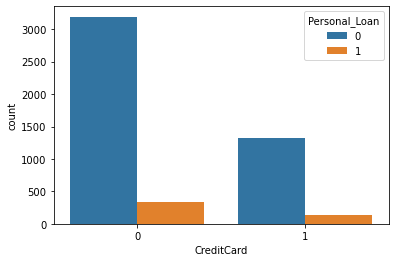

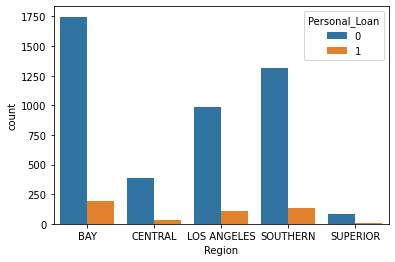

<IPython.core.display.Javascript object>

In [46]:
for i in range(len(category_col)):
    sns.countplot(data=data, x=category_col[i], hue="Personal_Loan")
    plt.show()

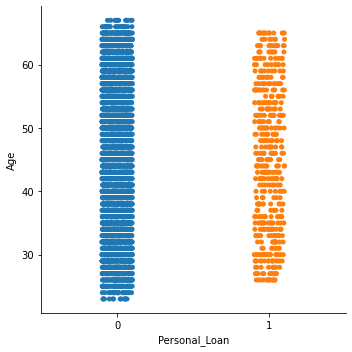

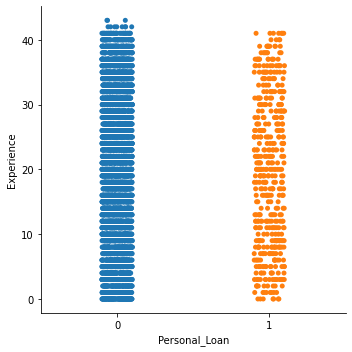

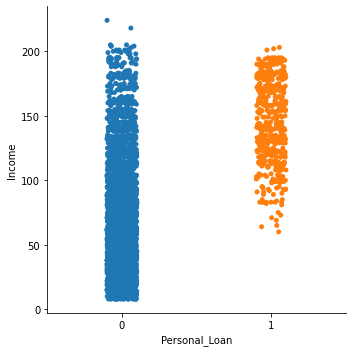

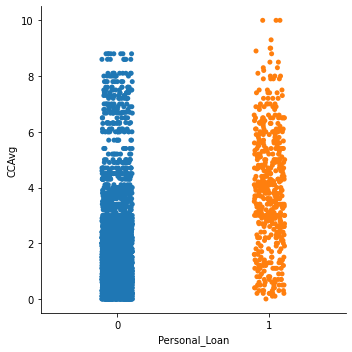

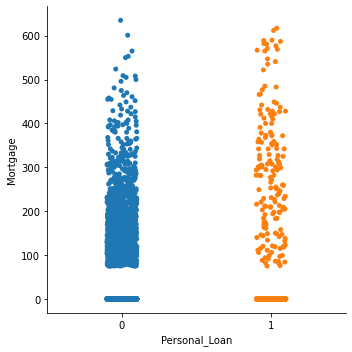

<IPython.core.display.Javascript object>

In [47]:
for i in range(len(num_col)):
    sns.catplot(x="Personal_Loan", y=num_col[i], data=data)
    plt.show()

([<matplotlib.patches.Wedge at 0x132631b0400>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.5729187096941336, -0.17822500408867725, '9.6%')])

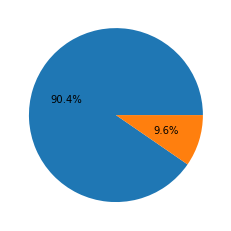

<IPython.core.display.Javascript object>

In [48]:
plt.pie(data=data, x=data["Personal_Loan"].value_counts(), autopct="%1.1f%%")

In [49]:
data.corr()

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan
Age,1.000000,0.994198,-0.055269,-0.052012,-0.012539,-0.007726
Experience,0.994198,1.000000,-0.046729,-0.049912,-0.010840,-0.007858
Income,-0.055269,-0.046729,1.000000,0.645984,0.206806,0.502462
CCAvg,-0.052012,-0.049912,0.645984,1.000000,0.109905,0.366889
Mortgage,-0.012539,-0.010840,0.206806,0.109905,1.000000,0.142095
Personal_Loan,-0.007726,-0.007858,0.502462,0.366889,0.142095,1.000000


<IPython.core.display.Javascript object>

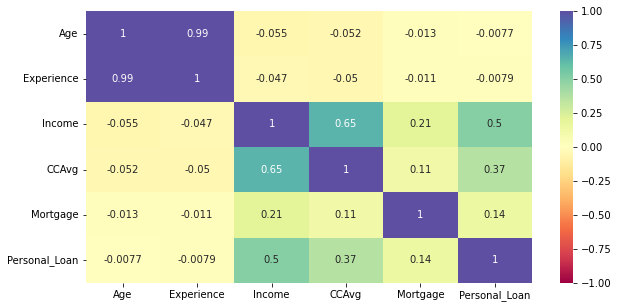

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

### Insights based on EDA

* Age and Experience are highly correlated, so one column can be dropped. 

* High income people are opting for personal loan. 

* The ratio of people with & without Personal loan are better in Los Angeles compare to Bay area region. 

* Customers with both low & high mortage amounts are equally spread in Personal loan category.

* In all the variables, there are less customers with Personal_Loan 

* Exceptionally customers with **CD_Account** are having more Personal Loan.

### Outliers detection

In [51]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
County                0
Region                0
dtype: int64

<IPython.core.display.Javascript object>

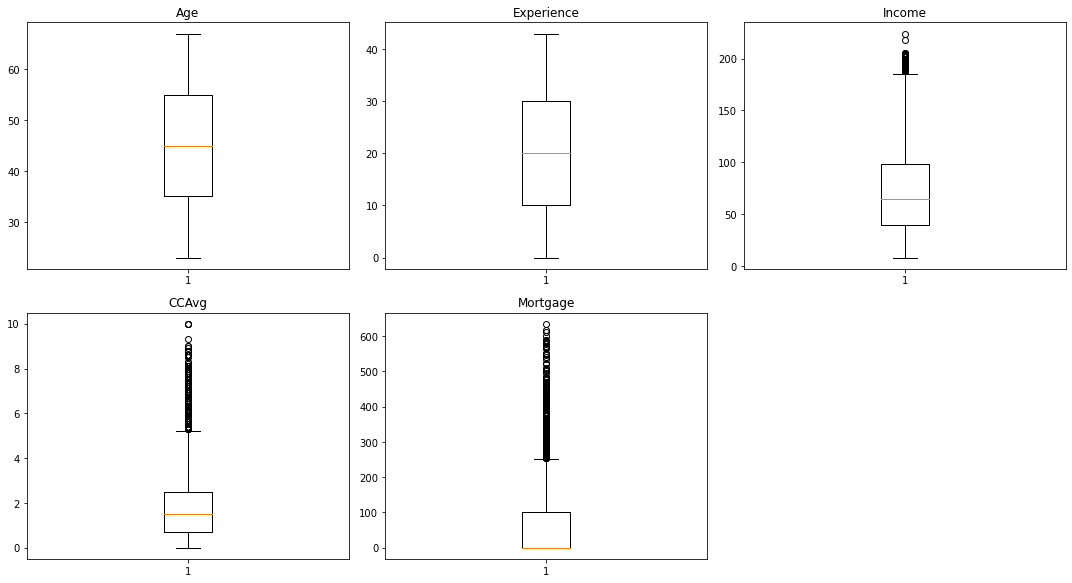

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Let's find the percentage of outliers, in each column of the data, using IQR.**

**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively.

**Note**: Generally, a value of 1.5 * IQR is taken to cap the values of outliers to upper and lower whiskers but any number (example 0.5, 2, 3, etc) other than 1.5 can be chosen. The value depends upon the business problem statement.

In [53]:
# Finding the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[num_col].quantile(0.25)
Q3 = data[num_col].quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [54]:
# Percentage of outliers in each column
((data[num_col] < lower_whisker) | (data[num_col] > upper_whisker)).sum() / data.shape[
    0
] * 100

Age           0.00
Experience    0.00
Income        1.92
CCAvg         6.48
Mortgage      5.82
dtype: float64

<IPython.core.display.Javascript object>

In [55]:
Q1 = data["CCAvg"].quantile(0.25)  # 25th quantile
Q3 = data["CCAvg"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
print(lower_whisker)
print(upper_whisker)

-2.0
5.2


<IPython.core.display.Javascript object>

In [56]:
data.loc[data["CCAvg"] > 5.20].sort_values("CCAvg", ascending=False)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Region
2337,43,16,201,1,10.00,2,0,1,0,0,0,1,Santa Clara County,BAY
787,45,15,202,3,10.00,3,0,1,0,0,0,0,Los Angeles County,LOS ANGELES
2101,35,5,203,1,10.00,3,0,1,0,0,0,0,Santa Clara County,BAY
3943,61,36,188,1,9.30,2,0,1,0,0,0,0,Ventura County,SOUTHERN
3822,63,33,178,4,9.00,3,0,1,0,0,0,0,Los Angeles County,LOS ANGELES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,45,18,163,3,5.33,2,0,1,0,1,0,1,Alameda County,BAY
1768,43,18,128,4,5.30,1,84,1,0,0,0,0,San Diego County,SOUTHERN
4470,44,20,111,2,5.30,2,0,1,0,0,1,0,San Diego County,SOUTHERN
4980,29,5,135,3,5.30,1,0,1,0,1,1,1,El Dorado County,CENTRAL


<IPython.core.display.Javascript object>

In [57]:
Q1 = data["Mortgage"].quantile(0.25)  # 25th quantile
Q3 = data["Mortgage"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
print(lower_whisker)
print(upper_whisker)

-151.5
252.5


<IPython.core.display.Javascript object>

In [58]:
data.loc[data["Mortgage"] > 252.5].sort_values("Mortgage", ascending=False)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Region
2934,37,13,195,2,6.5,1,635,0,0,0,1,0,San Bernardino County,SOUTHERN
303,49,25,195,4,3.0,1,617,1,0,0,0,0,Yolo County,CENTRAL
4812,29,4,184,4,2.2,3,612,1,0,0,1,0,San Diego County,SOUTHERN
1783,53,27,192,1,1.7,1,601,0,0,0,1,0,Alameda County,BAY
4842,49,23,174,3,4.6,2,590,1,0,0,0,0,Mendocino County,SUPERIOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,25,0,101,4,2.3,3,256,0,0,0,0,1,Alameda County,BAY
3950,38,14,62,1,1.5,3,255,0,0,0,1,0,San Francisco County,BAY
2159,61,35,99,1,4.8,3,255,1,0,0,0,1,Santa Clara County,BAY
3138,36,11,103,1,4.6,1,255,0,0,0,1,0,Kern County,SOUTHERN


<IPython.core.display.Javascript object>

**Income, CCAvg & Mortgage are having some extreme values but while we are checking the records its looking almost continuous. As some customers are having some extreme amounts, we can't simply remove as the model won't predict it properly. So, outliers are not required to be treated in this case**

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  County              5000 non-null   object  
 13  Region              5000 non-null   category
dtypes: category(7), float64(1), int64(5), object(1)
memory usage: 308.8+ KB


<IPython.core.display.Javascript object>

In [60]:
data.drop(
    ["Experience", "County"], axis=1, inplace=True
)  # drop the Experience & County columns

<IPython.core.display.Javascript object>

In [61]:
data.sample(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Region
4545,61,35,2,0.2,3,0,0,0,0,1,0,LOS ANGELES
4760,50,18,2,0.0,1,0,0,0,0,0,1,CENTRAL
4476,58,40,2,0.3,1,0,0,0,0,0,0,CENTRAL
4605,48,42,1,1.2,2,0,0,0,0,0,0,BAY
4073,51,19,1,0.2,1,0,0,0,0,0,0,SOUTHERN
6,53,72,2,1.5,2,0,0,0,0,1,0,LOS ANGELES
1720,52,8,1,0.3,1,0,0,0,0,1,0,BAY
2263,47,28,3,1.5,1,0,0,0,0,1,0,SOUTHERN
3757,45,142,1,1.4,2,0,1,0,0,1,0,LOS ANGELES
3023,63,105,4,1.7,3,244,0,0,0,0,1,SOUTHERN


<IPython.core.display.Javascript object>

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   category
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   category
 5   Mortgage            5000 non-null   int64   
 6   Personal_Loan       5000 non-null   int64   
 7   Securities_Account  5000 non-null   category
 8   CD_Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
 11  Region              5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.6 KB


<IPython.core.display.Javascript object>

## Model Building <a class="anchor" id="model-build"></a>

### Preparing for Maching Learning Model

In [63]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    data, columns=["Family", "Education", "Region"], drop_first=True,
)
dummy_data.head()

,Age,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Region_CENTRAL,Region_LOS ANGELES,Region_SOUTHERN,Region_SUPERIOR
0,25,49,1.6,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,35,45,1.0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0


<IPython.core.display.Javascript object>

## Split Data

In [64]:
X = dummy_data.drop("Personal_Loan", axis=1)  # Features
y = dummy_data["Personal_Loan"].astype("int64")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

<IPython.core.display.Javascript object>

In [66]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)
print(X_train.shape, X_test.shape)

(3500, 17) (1500, 17)


<IPython.core.display.Javascript object>

In [67]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

**Since the train & test set has 0 and 1(target variable) in 9:1 ratio like the original data, Stratify=Y is not needed**

In [68]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a person will accept a personal loan but in actual doesn't - Loss of Resource
2. Predicting a person will not accept a loan but in actual does - Loss of Opportunity

### Which case is more important? 

* The purpose of the campagin is to bring in more customers who accepts the Personal loan. But incase of "Loss of Opportunity" the bank missed the potential customer. Comparitively the loss is much greater than the first case which is "Loss of Resource". So minimizing this loss is the important goal of this modelling.


### How to reduce this loss i.e need to reduce False Negatives?

* Recall is the right metric to check the performance of the model as Banks wants more number of customers who can take the personal loan. Greater the recall lesser the chances of false negatives.


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [69]:
## defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [70]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn


def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Logistic Regression <a class="anchor" id="log-reg"></a>

#### Starting with Logistic Regression which is used for predicting binary outcomes.

1. Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
2. Logistic regression is an estimation of the Logit function. The logit function is simply a log of odds in favor of the event.
3. This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

In [71]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
lg.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

### Finding the coefficients

In [72]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Region_CENTRAL,Region_LOS ANGELES,Region_SOUTHERN,Region_SUPERIOR
coef,0.005319,0.056969,0.213882,0.000797,-0.709452,2.974282,-0.465518,-0.773165,-0.110169,2.13511,1.404999,3.342446,3.552707,-0.106118,-0.028152,0.187004,-0.67566


<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficients of some variables are positive, an increase in these will lead to an increase the chances of a person to accept the Personal Loan. 
* Coefficients of some other features are negative, an increase in these will lead to a decrease the chances of a person to accept the Personal Loan. 

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [73]:
## Odds from coefficients

odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Region_CENTRAL,Region_LOS ANGELES,Region_SOUTHERN,Region_SUPERIOR
Odds,1.005333,1.058623,1.238476,1.000797,0.491914,19.575568,0.627810,0.461550,0.895682,8.457973,4.075521,28.288226,34.907697,0.899318,0.972240,1.205633,0.508820
Change_odd%,0.533309,5.862255,23.847647,0.079707,-50.808618,1857.556769,-37.219012,-53.845021,-10.431764,745.797321,307.552089,2728.822587,3390.769743,-10.068192,-2.775957,20.563251,-49.117953


<IPython.core.display.Javascript object>

#### Checking model performance on training set

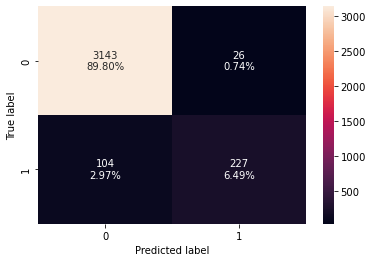

<IPython.core.display.Javascript object>

In [74]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [75]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.962857,0.685801,0.897233,0.777397


<IPython.core.display.Javascript object>

#### Checking performance on test set

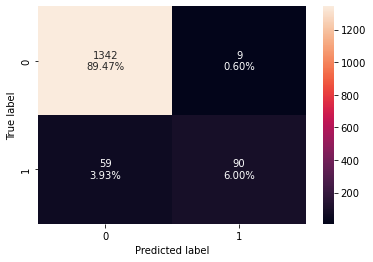

<IPython.core.display.Javascript object>

In [76]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [77]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.954667,0.604027,0.909091,0.725806


<IPython.core.display.Javascript object>

#### ROC-AUC

* The area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at distinguishing between classes.

#### 1.  predict_proba

Predicts the probabilities for the class 0 and 1. 

**Input**: Train or test data 

**Output**: Returns the predicted probabilities for class 0 and 1

#### 2. roc_curve_score 

Returns the auc scores

**Input**: 
         1. Training data
         2. Predicted Probability
         
**Output**: AUC scores between 0 and 1
 
#### 3. roc_curve

Returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
 
**Input:** 
        1. Training data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

**ROC-AUC on training set**

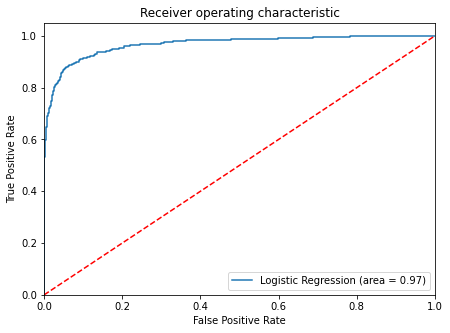

<IPython.core.display.Javascript object>

In [78]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**ROC-AUC on test set**

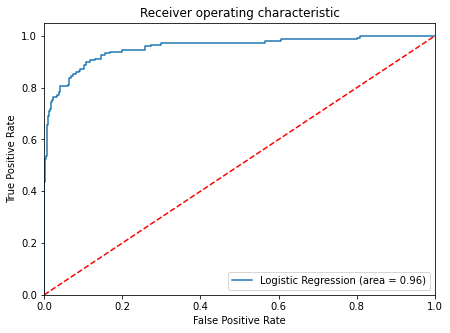

<IPython.core.display.Javascript object>

In [79]:
# Find the roc auc score for training data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Model is giving a generalized performance**

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

Optimal thresold is the value that best separated the True positive rate and False positive rate. 

In [80]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted
# probabilities for the class 1.

fpr, tpr, thresholds = roc_curve(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.13649362034776755


<IPython.core.display.Javascript object>

**Threshold 0.1365**

#### Checking model performance on training set

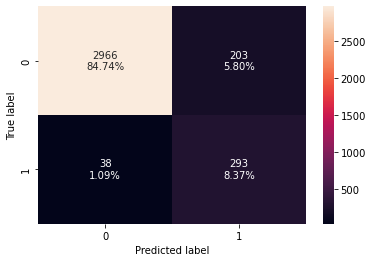

<IPython.core.display.Javascript object>

In [81]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [82]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.931143,0.885196,0.590726,0.708585


<IPython.core.display.Javascript object>

#### Checking model performance on test set

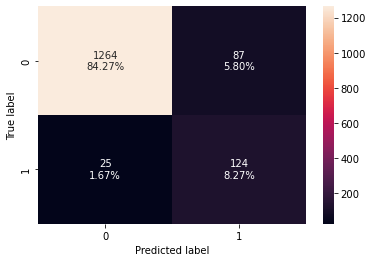

<IPython.core.display.Javascript object>

In [83]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [84]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.925333,0.832215,0.587678,0.688889


<IPython.core.display.Javascript object>

* The precision of the model for both training and test set has improved but the F1 score has reduced.

#### Let's use Precision-Recall curve and see if we can find a better threshold

The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement. 

#### precision_recall_curve()

Returns the fpr, tpr and threshold values

**Input:** 
        1. Original data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

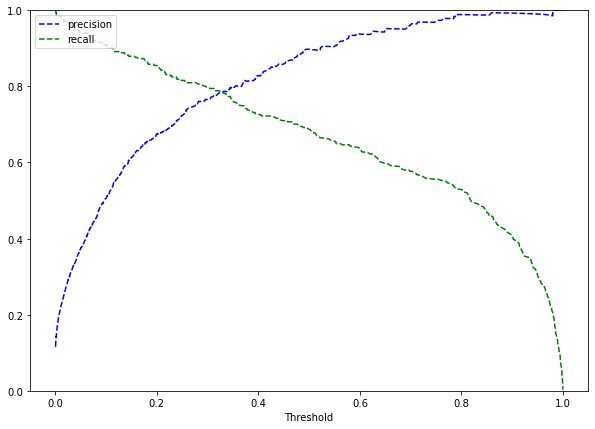

<IPython.core.display.Javascript object>

In [85]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [86]:
for idx in range(len(prec)):
    if prec[idx] == rec[idx]:
        print(prec[idx], rec[idx], tre[idx])

0.7854984894259819 0.7854984894259819 0.3295665242139768


<IPython.core.display.Javascript object>

In [87]:
# setting the threshold
optimal_threshold_curve = 0.3296

<IPython.core.display.Javascript object>

**Checking model performance on training set**

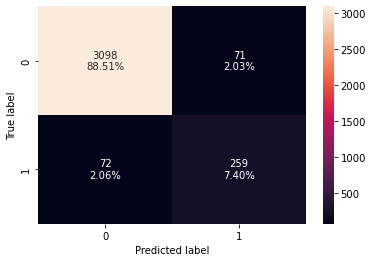

<IPython.core.display.Javascript object>

In [88]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [89]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.959143,0.782477,0.784848,0.783661


<IPython.core.display.Javascript object>

**Checking model performance on test set**

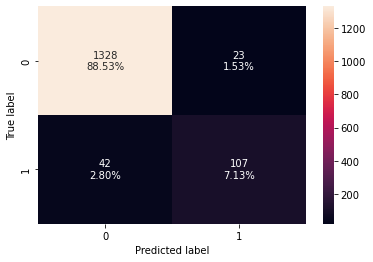

<IPython.core.display.Javascript object>

In [90]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [91]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.956667,0.718121,0.823077,0.767025


<IPython.core.display.Javascript object>

## Model Performance Summary

In [92]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.1364 Threshold",
    "Logistic Regression-0.3296 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.1364 Threshold,Logistic Regression-0.3296 Threshold
Accuracy,0.962857,0.931143,0.959143
Recall,0.685801,0.885196,0.782477
Precision,0.897233,0.590726,0.784848
F1,0.777397,0.708585,0.783661


<IPython.core.display.Javascript object>

In [93]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.1364 Threshold",
    "Logistic Regression-0.3296 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.1364 Threshold,Logistic Regression-0.3296 Threshold
Accuracy,0.954667,0.925333,0.956667
Recall,0.604027,0.832215,0.718121
Precision,0.909091,0.587678,0.823077
F1,0.725806,0.688889,0.767025


<IPython.core.display.Javascript object>

### Logistic Regression Conclusion

* By changing the threshold of the logistic regression model we were able to see a significant improvement in the model performance.
* The model achieved a recall of 0.88 on the training set and 0.83 on the testing set with threshold set at 0.1364.
* Also with the threshold set at 0.3296, the recall value is 0.78 on the training set and 0.71 on the testing set

## Decision Tree Classifier <a class="anchor" id="dec-tree"></a>

* A decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on the most significant splitter/differentiator in input variables.

* Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [94]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [95]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model

In [96]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

 #### Checking model performance on training set

In [97]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

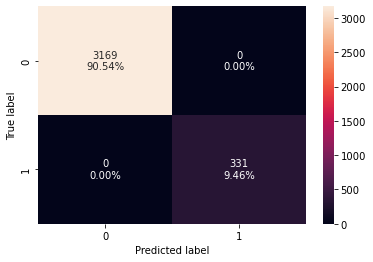

<IPython.core.display.Javascript object>

In [98]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [99]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.982667,0.90604,0.918367,0.912162


<IPython.core.display.Javascript object>

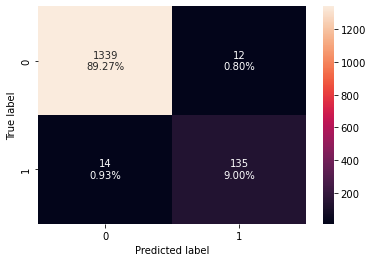

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(model, X_test, y_test)

## Visualizing the Decision Tree¶

In [101]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Region_CENTRAL', 'Region_LOS ANGELES', 'Region_SOUTHERN', 'Region_SUPERIOR']


<IPython.core.display.Javascript object>

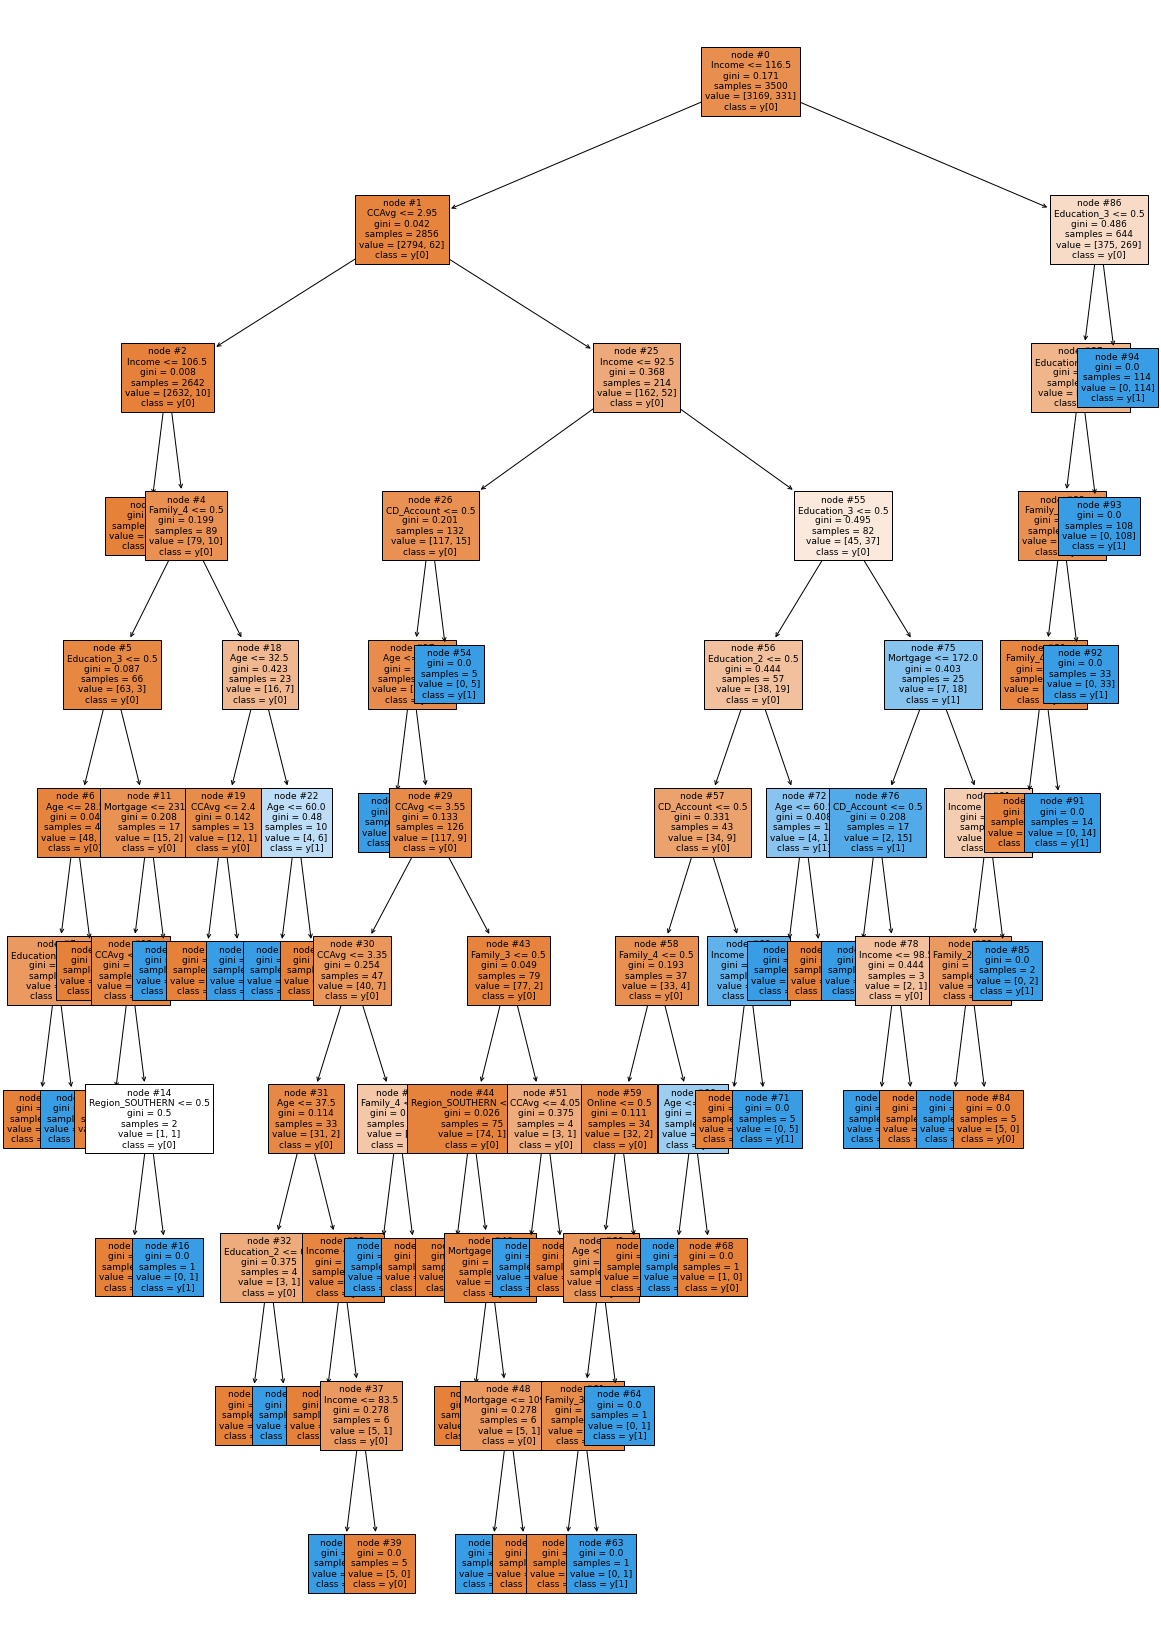

<IPython.core.display.Javascript object>

In [102]:

plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [103]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Region_SOUTHERN <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Region_SOUTH

<IPython.core.display.Javascript object>

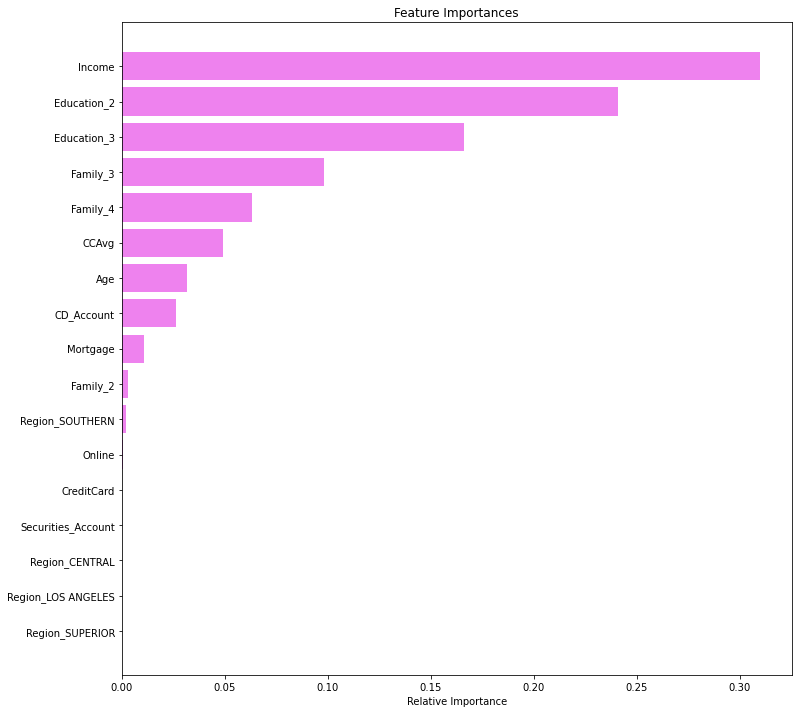

<IPython.core.display.Javascript object>

In [104]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

#### Using GridSearch for Hyperparameter tuning of our tree model

In [105]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [2, 3, 5, 8],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8,
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

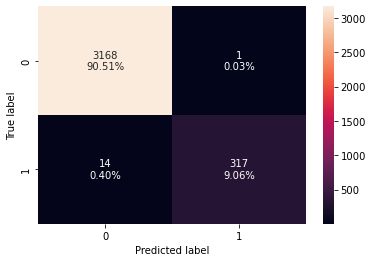

<IPython.core.display.Javascript object>

In [106]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [107]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.995714,0.957704,0.996855,0.976888


<IPython.core.display.Javascript object>

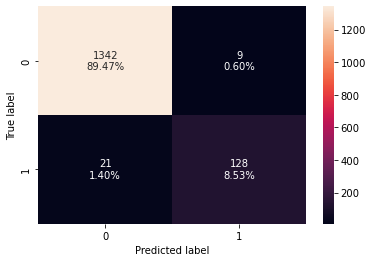

<IPython.core.display.Javascript object>

In [108]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [109]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.85906,0.934307,0.895105


<IPython.core.display.Javascript object>

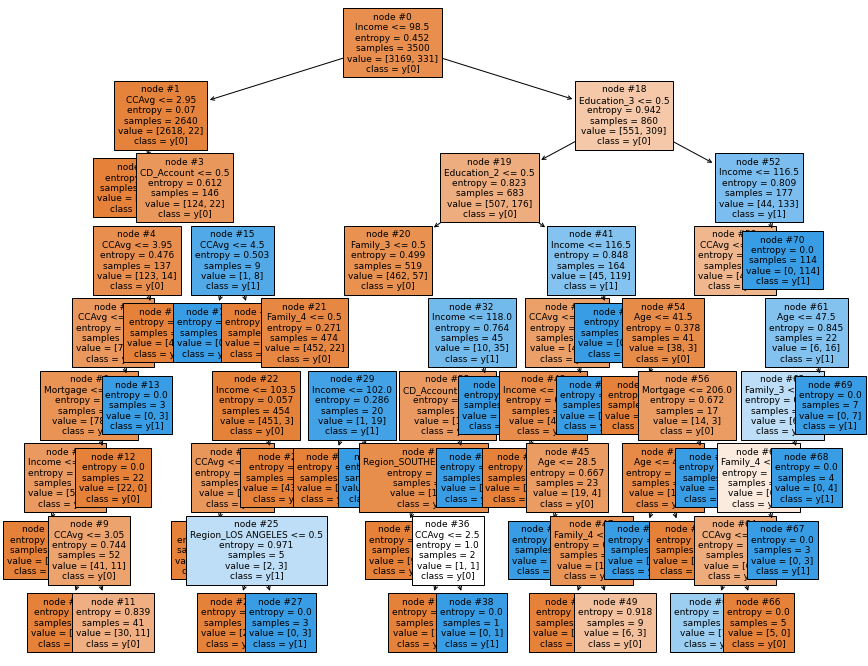

<IPython.core.display.Javascript object>

In [110]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [111]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2494.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- CCAvg <= 3.85
|   |   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |--- weights: [30.00, 11.00] class: 0
|   |   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |   |--- weights: [22.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.85
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [45.00, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.50
|   |   |   |

<IPython.core.display.Javascript object>

In [112]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.539572
CCAvg               0.114130
Education_2         0.106882
Family_4            0.068724
Education_3         0.068235
Family_3            0.065140
CD_Account          0.014674
Age                 0.010474
Mortgage            0.007161
Region_LOS ANGELES  0.003163
Region_SOUTHERN     0.001847
Region_CENTRAL      0.000000
Family_2            0.000000
CreditCard          0.000000
Online              0.000000
Securities_Account  0.000000
Region_SUPERIOR     0.000000


<IPython.core.display.Javascript object>

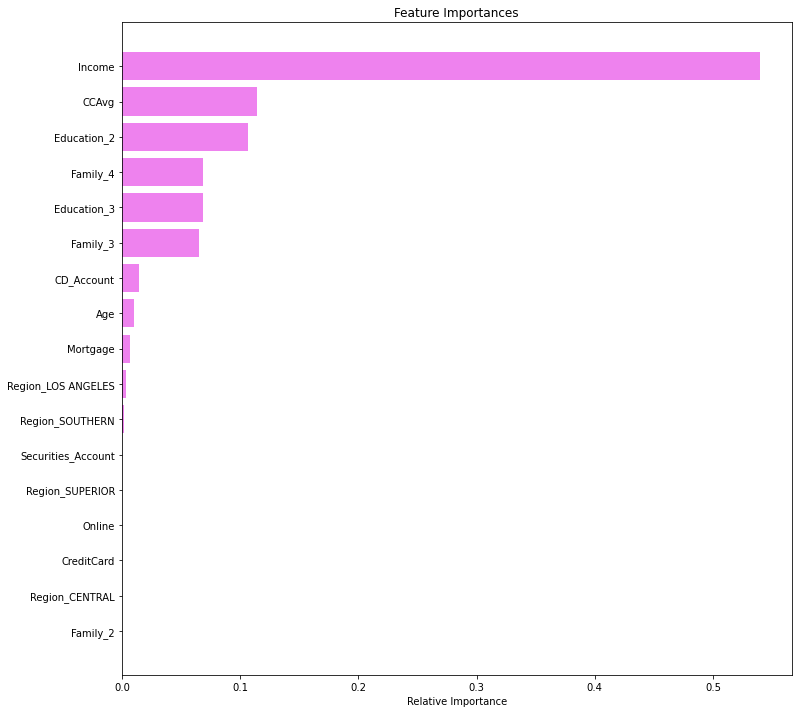

<IPython.core.display.Javascript object>

In [113]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [114]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [115]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000188,0.000564
2,0.000268,0.001100
3,0.000268,0.002173
4,0.000275,0.002723
5,0.000275,0.003824
6,0.000359,0.004900
7,0.000381,0.005280
8,0.000381,0.005661
9,0.000476,0.006138


<IPython.core.display.Javascript object>

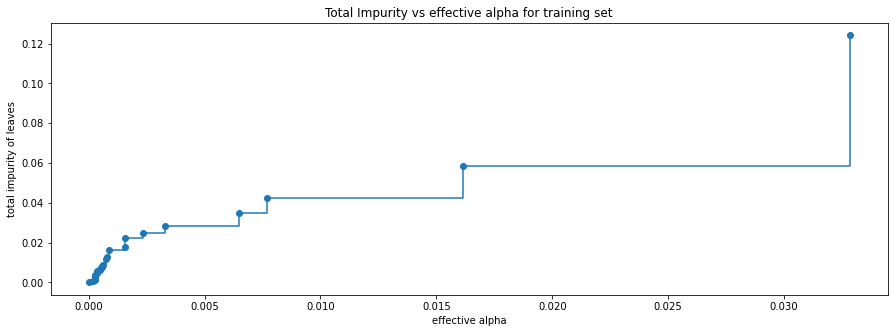

<IPython.core.display.Javascript object>

In [116]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [117]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596768


<IPython.core.display.Javascript object>

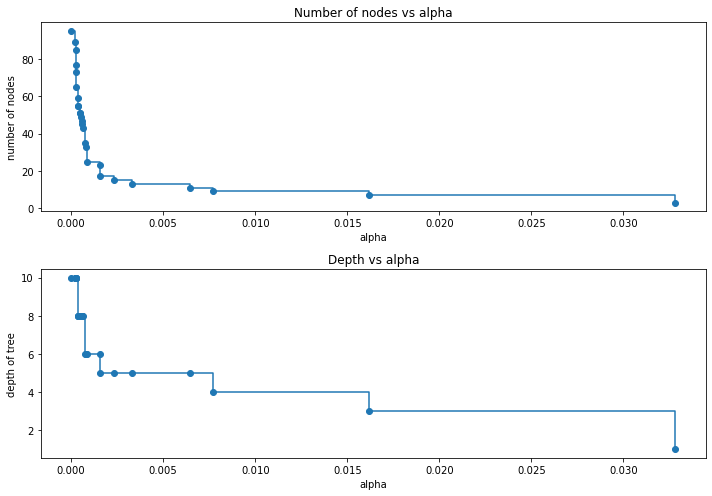

<IPython.core.display.Javascript object>

In [118]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall vs alpha for training and testing sets¶

In [119]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [120]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

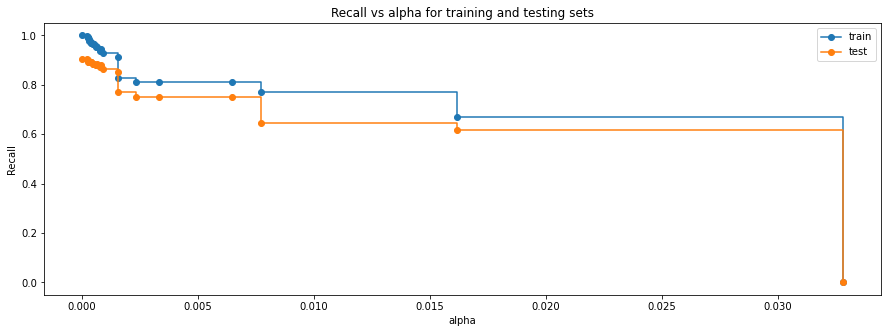

<IPython.core.display.Javascript object>

In [121]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Checking model performance on training set

In [122]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


<IPython.core.display.Javascript object>

In [123]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [124]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

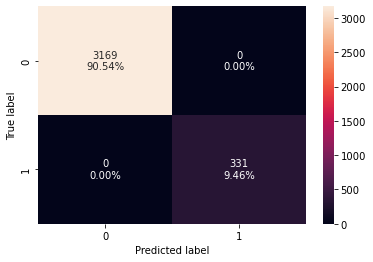

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(best_model, X_train, y_train)

### Checking model performance on testing set

In [126]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.982667,0.90604,0.918367,0.912162


<IPython.core.display.Javascript object>

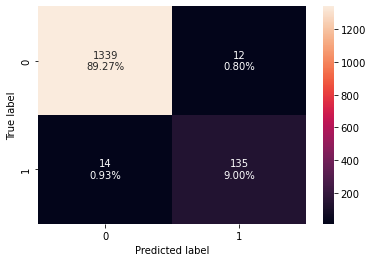

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn(best_model, X_test, y_test)

## Visualizing the Decision Tree

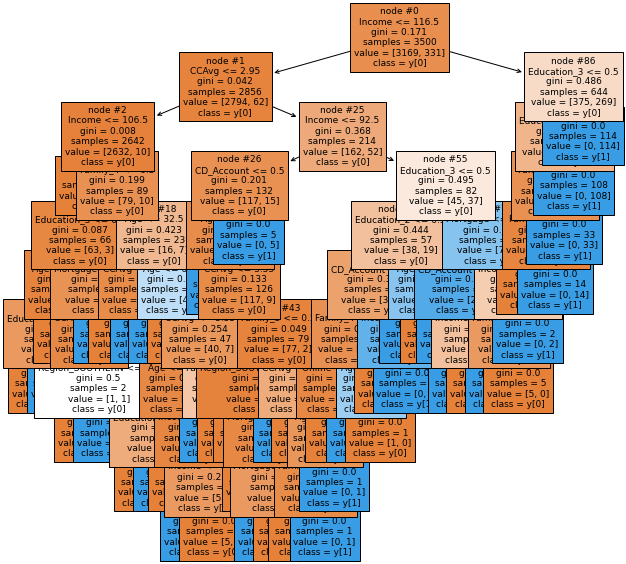

<IPython.core.display.Javascript object>

In [128]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [129]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Region_SOUTHERN <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Region_SOUTH

<IPython.core.display.Javascript object>

In [130]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.309518
Education_2         0.240847
Education_3         0.165787
Family_3            0.098116
Family_4            0.062971
CCAvg               0.049225
Age                 0.031453
CD_Account          0.026348
Mortgage            0.010584
Family_2            0.002781
Region_SOUTHERN     0.001809
Online              0.000561
CreditCard          0.000000
Securities_Account  0.000000
Region_CENTRAL      0.000000
Region_LOS ANGELES  0.000000
Region_SUPERIOR     0.000000


<IPython.core.display.Javascript object>

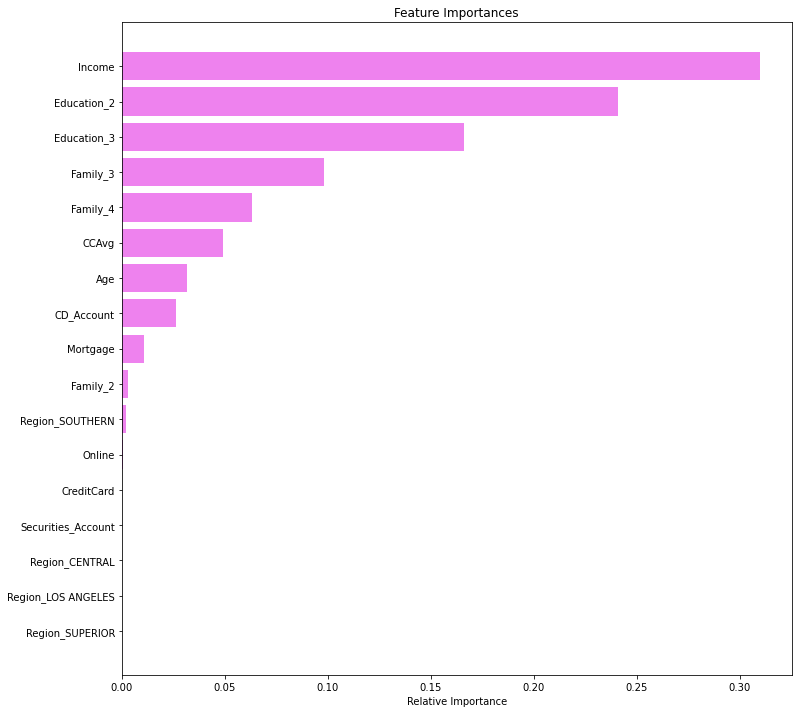

<IPython.core.display.Javascript object>

In [131]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Creating model with 0.002 ccp_alpha

In [132]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.002, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on the training set

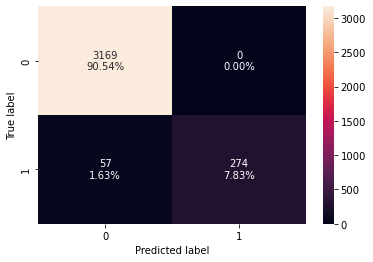

<IPython.core.display.Javascript object>

In [133]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [134]:
decision_tree_postpruned_perf1_train = model_performance_classification_sklearn(
    best_model2, X_train, y_train
)
decision_tree_postpruned_perf1_train

,Accuracy,Recall,Precision,F1
0,0.983714,0.827795,1.0,0.905785


<IPython.core.display.Javascript object>

#### Checking performance on the test set¶

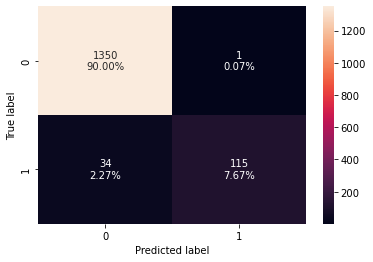

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [136]:
decision_tree_postpruned_perf1_test = model_performance_classification_sklearn(
    best_model2, X_test, y_test
)
decision_tree_postpruned_perf1_test

,Accuracy,Recall,Precision,F1
0,0.976667,0.771812,0.991379,0.867925


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

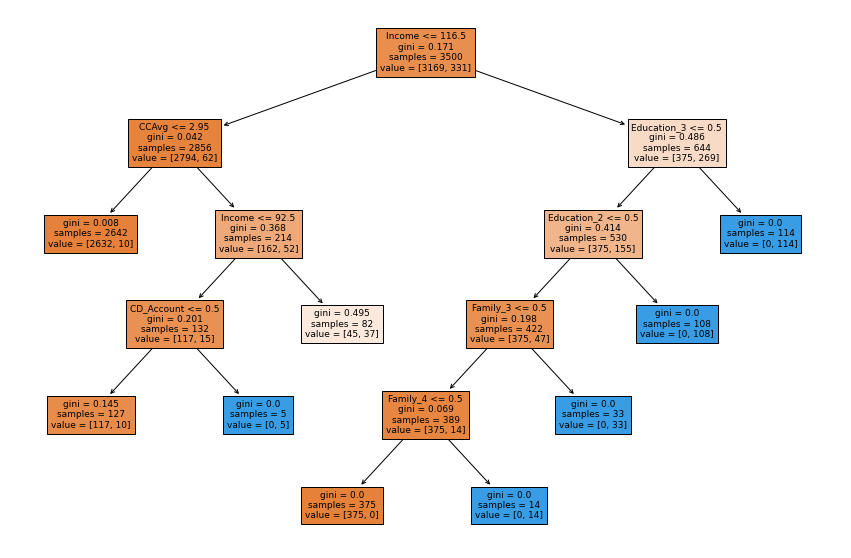

<IPython.core.display.Javascript object>

In [137]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [138]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [0.00, 33.00] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [0.00, 108.00] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [0.00, 114.00] class: 1



<IPython.core.display.Javascript object>

In [139]:
print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.338827
Education_2         0.260953
Education_3         0.180497
Family_3            0.108637
Family_4            0.051865
CCAvg               0.043531
CD_Account          0.015690
Age                 0.000000
Region_SOUTHERN     0.000000
Region_LOS ANGELES  0.000000
Region_CENTRAL      0.000000
Family_2            0.000000
CreditCard          0.000000
Online              0.000000
Securities_Account  0.000000
Mortgage            0.000000
Region_SUPERIOR     0.000000


<IPython.core.display.Javascript object>

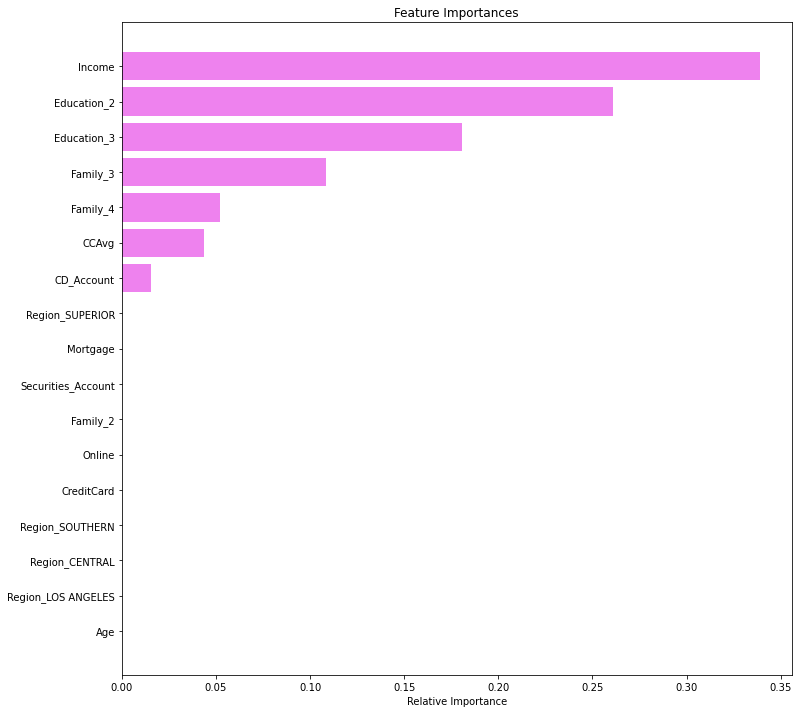

<IPython.core.display.Javascript object>

In [140]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparing all the decision tree models

In [141]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
        decision_tree_postpruned_perf1_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post ccp_alpha 0.002)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Decision Tree (Post ccp_alpha 0.002)
Accuracy,1.0,0.995714,1.0,0.983714
Recall,1.0,0.957704,1.0,0.827795
Precision,1.0,0.996855,1.0,1.000000
F1,1.0,0.976888,1.0,0.905785


<IPython.core.display.Javascript object>

In [142]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
        decision_tree_postpruned_perf1_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post ccp_alpha 0.002)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Decision Tree (Post ccp_alpha 0.002)
Accuracy,0.982667,0.980000,0.982667,0.976667
Recall,0.906040,0.859060,0.906040,0.771812
Precision,0.918367,0.934307,0.918367,0.991379
F1,0.912162,0.895105,0.912162,0.867925


<IPython.core.display.Javascript object>

### Decision Tree (Without Class weight) Model Conclusion

* Decision tree model with pre-pruning has given the best recall score on training data.

* The pre-pruned and the post-pruned models(with ccp_alpha 0.002) have reduced overfitting and the model is giving a generalized performance.

* The model achieved a recall of 0.95 on the training set and 0.85 on the testing set with Pre-Pruning technique.

* Also with the post-pruned models(with ccp_alpha 0.002), the recall value is 0.82 on the training set and 0.77 on the testing set

## Building a Decision Tree model with Class_weight

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.10,1:0.90} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [143]:
model_c = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.10, 1: 0.90}, random_state=1
)
model_c.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

In [144]:
decision_tree_perf_c_train = model_performance_classification_sklearn(
    model_c, X_train, y_train
)
decision_tree_perf_c_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [145]:
decision_tree_perf_c_test = model_performance_classification_sklearn(
    model_c, X_test, y_test
)
decision_tree_perf_c_test

,Accuracy,Recall,Precision,F1
0,0.976,0.852349,0.900709,0.875862


<IPython.core.display.Javascript object>

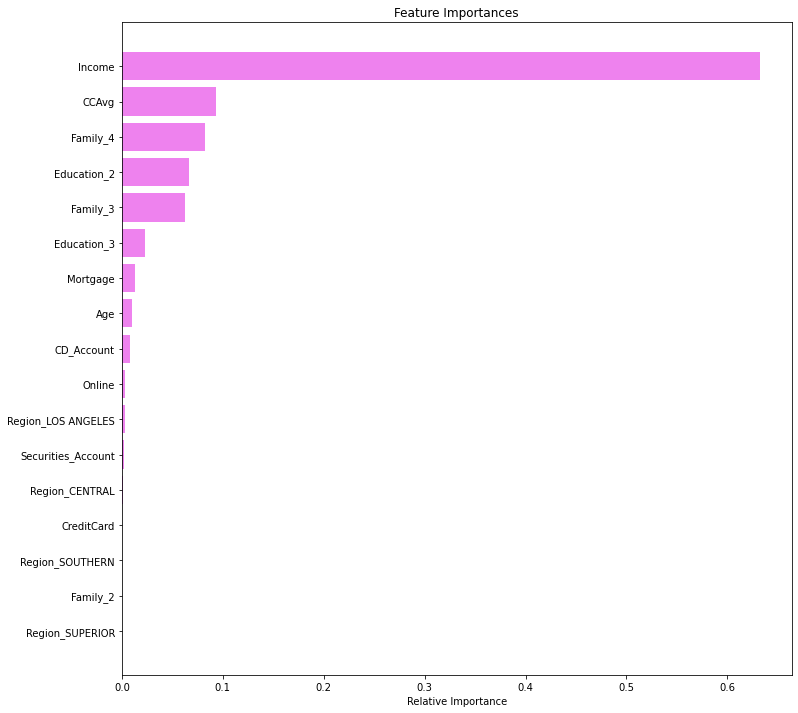

<IPython.core.display.Javascript object>

In [146]:
importances = model_c.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Reducing over fitting¶

In [147]:
# Choose the type of classifier.
estimator_c = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})

# Grid of parameters to choose from

parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator_c, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator_c = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator_c.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

<IPython.core.display.Javascript object>

In [148]:
decision_tree_tune_perf_c_train = model_performance_classification_sklearn(
    estimator_c, X_train, y_train
)
decision_tree_tune_perf_c_train

,Accuracy,Recall,Precision,F1
0,0.926,0.990937,0.561644,0.71694


<IPython.core.display.Javascript object>

In [149]:
decision_tree_tune_perf_c_test = model_performance_classification_sklearn(
    estimator_c, X_test, y_test
)

decision_tree_tune_perf_c_test

,Accuracy,Recall,Precision,F1
0,0.93,0.979866,0.58871,0.735516


<IPython.core.display.Javascript object>

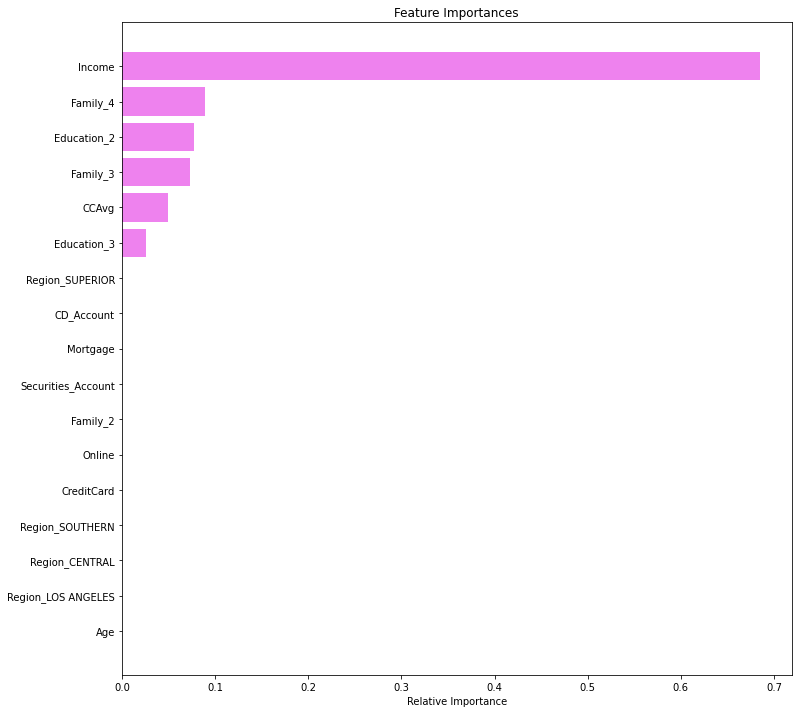

<IPython.core.display.Javascript object>

In [150]:
importances = estimator_c.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Cost Complexity Pruning

In [151]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [152]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.10, 1: 0.90}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2928785401980042


<IPython.core.display.Javascript object>

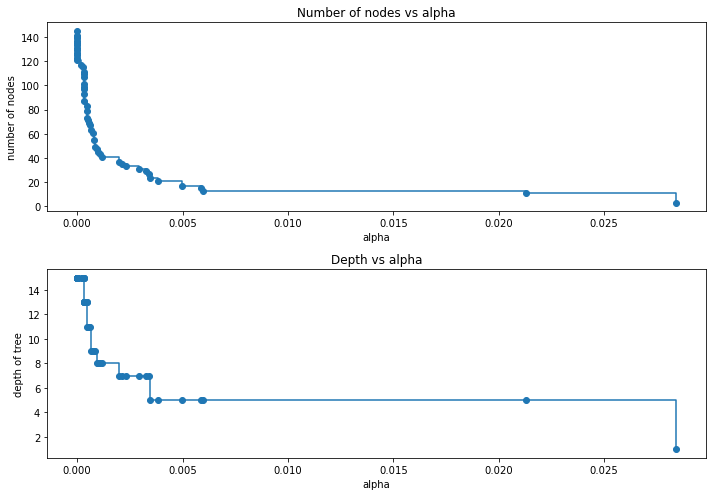

<IPython.core.display.Javascript object>

In [153]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall vs alpha for training and testing sets

In [154]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [155]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

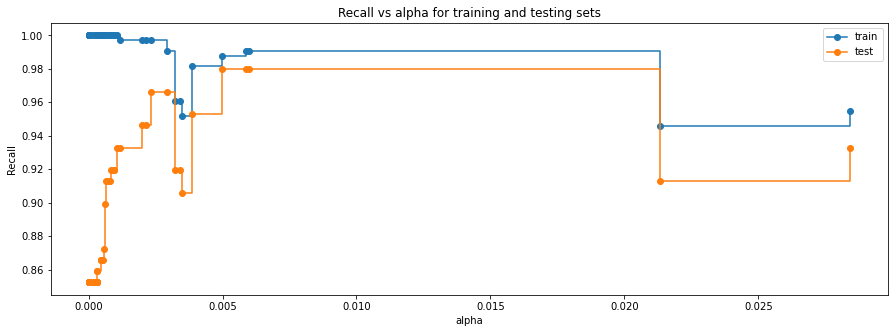

<IPython.core.display.Javascript object>

In [156]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Checking model performance on training set

In [157]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004980603234980801,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


<IPython.core.display.Javascript object>

In [158]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004980603234980801,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

In [159]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.939143,0.987915,0.610075,0.754325


<IPython.core.display.Javascript object>

In [160]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.938,0.979866,0.618644,0.758442


<IPython.core.display.Javascript object>

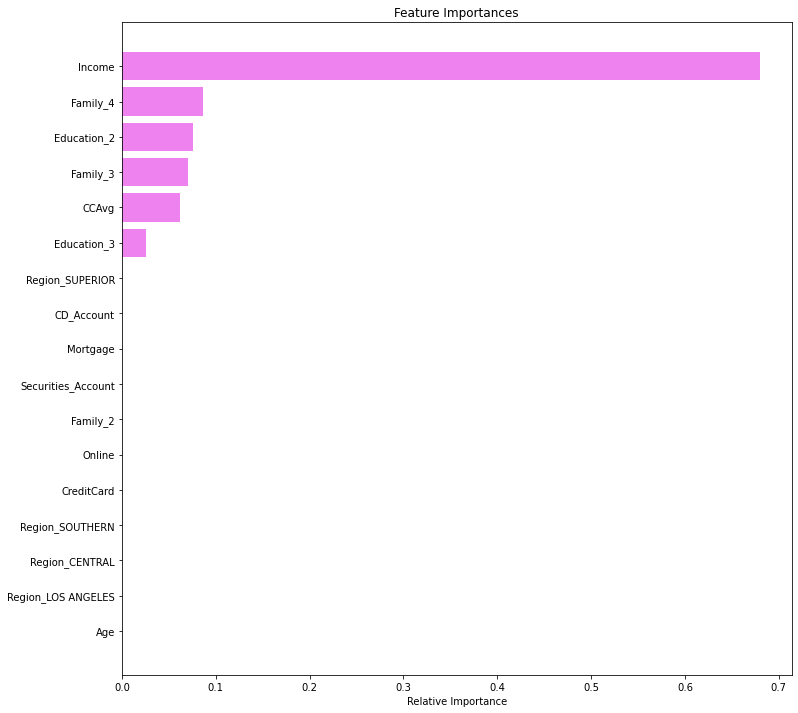

<IPython.core.display.Javascript object>

In [161]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [162]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.005, class_weight={0: 0.10, 1: 0.90}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

<IPython.core.display.Javascript object>

In [163]:
decision_tree_postpruned_perf1_train = model_performance_classification_sklearn(
    best_model2, X_train, y_train
)
decision_tree_postpruned_perf1_train

,Accuracy,Recall,Precision,F1
0,0.939143,0.987915,0.610075,0.754325


<IPython.core.display.Javascript object>

In [164]:
decision_tree_postpruned_perf1_test = model_performance_classification_sklearn(
    best_model2, X_test, y_test
)
decision_tree_postpruned_perf1_test

,Accuracy,Recall,Precision,F1
0,0.938,0.979866,0.618644,0.758442


<IPython.core.display.Javascript object>

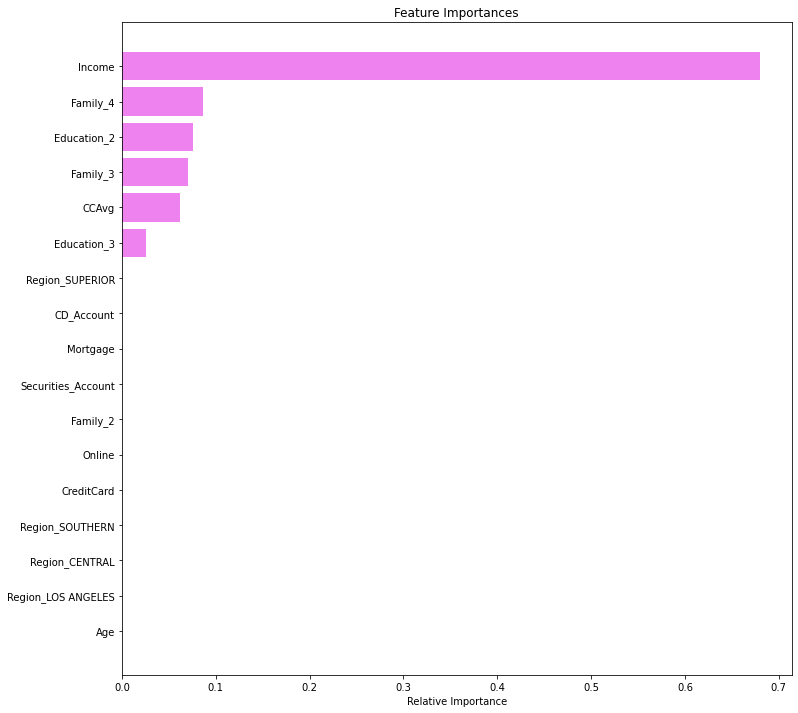

<IPython.core.display.Javascript object>

In [165]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [166]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
        decision_tree_postpruned_perf1_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post ccp_alpha 0.005)",
]
print("Training performance comparison(with class_weight):")
models_train_comp_df

Training performance comparison(with class_weight):


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Decision Tree (Post ccp_alpha 0.005)
Accuracy,1.0,0.995714,0.939143,0.939143
Recall,1.0,0.957704,0.987915,0.987915
Precision,1.0,0.996855,0.610075,0.610075
F1,1.0,0.976888,0.754325,0.754325


<IPython.core.display.Javascript object>

In [167]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
        decision_tree_postpruned_perf1_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post ccp_alpha 0.005)",
]
print("Test set performance comparison(with class_weight):")
models_train_comp_df

Test set performance comparison(with class_weight):


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Decision Tree (Post ccp_alpha 0.005)
Accuracy,0.982667,0.980000,0.938000,0.938000
Recall,0.906040,0.859060,0.979866,0.979866
Precision,0.918367,0.934307,0.618644,0.618644
F1,0.912162,0.895105,0.758442,0.758442


<IPython.core.display.Javascript object>

### Decision Tree (With Class weight) Model Conclusion

* Decision tree model with pre-pruning has given the best recall score on training data.

* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

* The model achieved a recall of 0.95 on the training set and 0.85 on the testing set with Pre-Pruning technique.

* Also with the post-pruned models, the recall value is 0.98 on the training set and 0.97 on the testing set.

* Changing the ccp_alpha value during the Post Pruning technique doesn't have much impact on the model performance.

## Conclusion <a class="anchor" id="con"></a>

- Analyzed the "Personal Loan Campaign Problem" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built will be used by marketing department to identify potential customer who have a higher probability of purchasing the loan.
- Using `Exploratory Data Analysis`, different features are compared using variety of graph to understand which feature having more impact in predicting the liability customer who will buy a personal loan. 
- First `Logistic Regression model` has been build and with the co-efficient values its clear that Income, Age, Some Education level etc are important and having positive values. Which will lead to increase in chances of a person borrowing a loan.
- Also the performance has been improved using ROC-AUC curve and optimal threshold. The model gave a high recall of 0.88 on the training set and 0.83 on the testing set with threshold set at 0.1364.
- Next `Decision Tree Classifier` is used for modelling and this algorithm will easily overfit. But this require less data processing compared to logistic regression and are easy to understand. 
- To avoid over fitting, pre pruning and post pruning techniques are used to come up with best recall values. 
- Pre Pruning method worked better with a recall values of 0.95 on the training set and 0.85 on the testing set.
- Features like Income, Credit Card Average, Education 2, Family 4 are most important in predicting the customer who will end up purchasing a personal loan. 
- Since the target variable are very much imbalanced, used the **Class Weight** technique to come up with a optimal solution. 
- With this post pruning method gave a good result of recall value 0.98 on the training set and 0.97 on the testing set.
- Features like Income, Family 4, Education 2 are most important in predicting the customer who will end up purchasing a personal loan. 

## Insights and Recommendations <a class="anchor" id="in-rec"></a>

* The model is built using Logistic Regression and Decision trees which will help the bank to focus on the liability customers.

* Business can consider the first model which is a logistic regression incase they want to avoid little overfitting. Also this model gives a better recall score with 0.1 threshold.

* Decision tree can easily overfit, but business/marketing team can consider this model if they carefully handle with Prepruning, PostPruning and Class weight techniques. 

* Based on EDA, logistic Regression, Decision tree (Feature Importance), its clear that Income ,Education, Family, CCavg are most important factors.

* Experience and Age are not having much impact on Personal loan, which means they can focus on all category people. 

* Customers with Security, Certificate of Deposits and Online Accounts are not having so much impact in Personal loans compare to people doesn't have one. 

* People in Bay area, Los Angeles & Southern are getting more loans compare to other regions. So, this regions need special attention.

* Certain Family and Education type are having slightly higher impact than the other types when its comes to personal loan. So these type of people be given more focus to get a higher number of personal loan customers. 

* People with lower mortgage and Credit card average are not getting the Personal loans compare to people with higher values of these. So team can foucs on people with very high amount on these features.  

* Finally people with good family backgroud and high education profile will end up with higher income. Which will definitely have impact in Credit Card Average. So this flow should be focused more by the Marketing team to end up with a higher number of Personal loan customers.

#### Hope marketing strategies of the bank will end up in all success using our Model!!!